#### Auteur: Irina Maslowski

### Projet N° 4 Segmentez des clients d'un site e-commerce

notebook brouillon contenant de nombreux tests

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import datetime as dt

In [4]:
from sklearn.cluster import KMeans

In [1]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score

In [6]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [7]:
import matplotlib.cm as cm

In [8]:
from sklearn.decomposition import PCA

In [9]:
from functions import *

In [10]:
from sklearn.manifold import TSNE

In [11]:
from collections import OrderedDict

In [21]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Chargement des données

In [13]:
df_customer_unique = pd.read_excel('C:/Users/piari/Documents/Projet4_ecommerce/df_customer_unique.xlsx')

In [14]:
df_customer_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93342 entries, 0 to 93341
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   order_id_nunique                             93342 non-null  int64  
 1   delta_date_order_first                       93342 non-null  float64
 2   delta_date_order_last                        93342 non-null  float64
 3   freight_value_max                            93342 non-null  float64
 4   contain_message_most_frequent                93342 non-null  bool   
 5   payment_type_most_frequent                   93342 non-null  object 
 6   product_category_name_most_frequent          93342 non-null  object 
 7   review_score_min                             93342 non-null  int64  
 8   delivery_period_max                          93342 non-null  float64
 9   delivered_sum                                93342 non-null  int64  
 10

In [11]:
df_customer_unique.isna().sum()

order_id_nunique                               0
delta_date_order_first                         0
delta_date_order_last                          0
freight_value_max                              0
contain_message_most_frequent                  0
payment_type_most_frequent                     0
product_category_name_most_frequent            0
review_score_min                               0
delivery_period_max                            0
delivered_sum                                  0
in_progress_sum                                0
unavailable_sum                                0
canceled_sum                                   0
product_volume_cm3_most_frequent               0
intime_delivery_mean                           0
intime_delivery_max                            0
payment_sequential_mean                        0
payment_installments_mean                      0
order_status_most_frequent                     0
customer_seller_distance_mean                  0
purchase_frequency_ 

In [12]:
df_customer_unique['most_frequent_general_product_category_name'].nunique()

26

In [13]:
df_customer_unique[['delivered_sum', 'in_progress_sum', 'unavailable_sum', 'canceled_sum']]

delivered_sum  in_progress_sum  unavailable_sum  canceled_sum
0                  1                0                0             0
1                  1                0                0             0
2                  1                0                0             0
3                  1                0                0             0
4                  1                0                0             0
...              ...              ...              ...           ...
93337              2                0                0             0
93338              1                0                0             0
93339              1                0                0             0
93340              1                0                0             0
93341              1                0                0             0

[93342 rows x 4 columns]

In [14]:
sum(df_customer_unique['canceled_sum'] > 0)

83

# Création de dataframe à partitionner

In [15]:
X = df_customer_unique.drop(['payment_type_most_frequent', 'product_category_name_most_frequent',
                             'most_frequent_general_product_category_name', 'contain_message_most_frequent',
                             'order_status_most_frequent', 'delivered_sum', 'in_progress_sum', 'unavailable_sum',
                             'canceled_sum'], axis=1)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93342 entries, 0 to 93341
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   order_id_nunique                  93342 non-null  int64  
 1   delta_date_order_first            93342 non-null  float64
 2   delta_date_order_last             93342 non-null  float64
 3   freight_value_max                 93342 non-null  float64
 4   review_score_min                  93342 non-null  int64  
 5   delivery_period_max               93342 non-null  float64
 6   product_volume_cm3_most_frequent  93342 non-null  float64
 7   intime_delivery_mean              93342 non-null  float64
 8   payment_sequential_mean           93342 non-null  float64
 9   payment_installments_mean         93342 non-null  float64
 10  customer_seller_distance_mean     93342 non-null  float64
 11  purchase_frequency_               93342 non-null  float64
 12  aver

# Test de l'algorithme KMeans

In [230]:
kmeans = KMeans(n_clusters=6)

In [231]:
%%time
estimator = make_pipeline(StandardScaler(), kmeans).fit(X)

Wall time: 3.89 s


In [232]:
estimator.named_steps['kmeans'].inertia_

812577.7178799865

In [233]:
# 2242581.087577893
kmeans.inertia_

812577.7178799865

In [234]:
labels = kmeans.labels_

In [235]:
# numéro de cluster pour chaque individus (on peux aussi utiliser predict)
labels

array([5, 5, 1, ..., 1, 5, 1])

In [236]:
pd.Series(labels).value_counts()

5    41459
1    31129
3     9664
2     6351
0     3416
4     1323
dtype: int64

In [237]:
# score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html
davies_bouldin_score(X, labels)

15.682105740526126

In [238]:
metrics.silhouette_score(X, labels, metric='euclidean')

-0.017732889846119315

In [239]:
kmeans.cluster_centers_

array([[-4.40804099e-02, -4.09437836e-02, -2.53570643e-02,
         3.16578259e+00, -1.07940101e-01,  1.88474165e-01,
         3.48900098e+00,  8.06642748e-02,  7.72255592e-02,
         4.80008379e-02,  8.48912907e-01,  1.15171980e-01,
        -9.17425439e-02,  1.16883277e+00],
       [-6.50510917e-02,  1.00769326e+00,  1.02822494e+00,
        -2.60930920e-01,  1.24244178e-01, -2.04518068e-01,
        -8.43307376e-02,  1.79448832e-01,  1.71794195e-01,
         2.60136482e-02,  1.73582300e-02, -2.56677224e-01,
        -9.95325113e-02, -5.76934568e-02],
       [-7.13174191e-02, -6.47536226e-02, -4.82555956e-02,
         6.50551552e-02, -1.69746496e+00,  2.33148275e+00,
        -3.55954446e-02, -2.10114404e+00, -2.08629626e+00,
        -4.83144502e-03,  4.52601231e-02,  3.50396693e-01,
        -9.79747664e-02, -5.38817333e-03],
       [-7.46407787e-02, -2.32207306e-02, -6.39173088e-03,
         7.24023977e-01,  1.01702304e-01,  4.90991823e-01,
        -1.42686201e-01,  4.03288500e-01,  3.

# Test de la librairie de visualisation pour Python "yellowbrick"

In [364]:
mpl.rcParams["figure.figsize"] = (9,6)

In [365]:
model_viz = KMeans()
# By default, the scoring parameter metric is set to distortion: mean sum of squared distances to centers
visualizer = KElbowVisualizer(model_viz, k=(2,10))

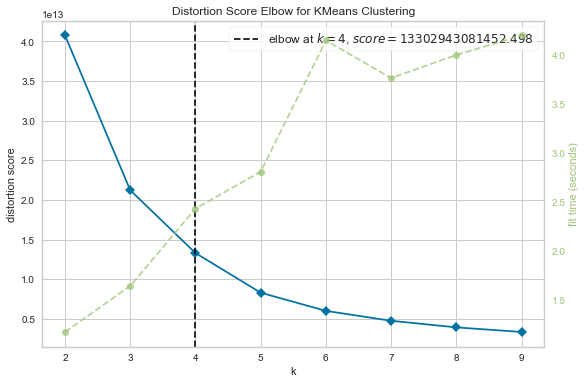

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
# 40 colonnes
#visualizer_2.fit(X)    # Fit the data to the visualizer
#visualizer_2.show()        # Finalize and render the figure

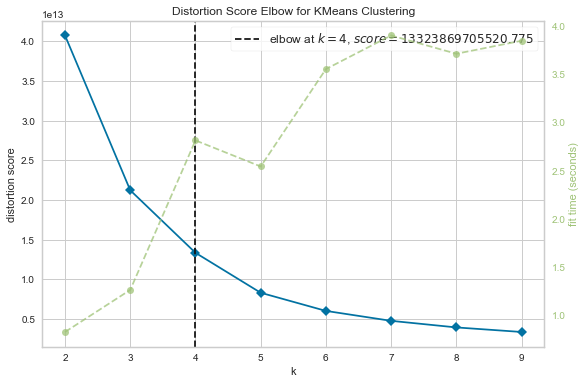

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [152]:
# 26 colonned
# visualizer_2.fit(X)    # Fit the data to the visualizer
# visualizer_2.show()        # Finalize and render the figure

## Normalisation de données

In [366]:
X_scaled_yel = StandardScaler().fit_transform(X)

## Visualisation de score de distortion et du coude pour KMeans

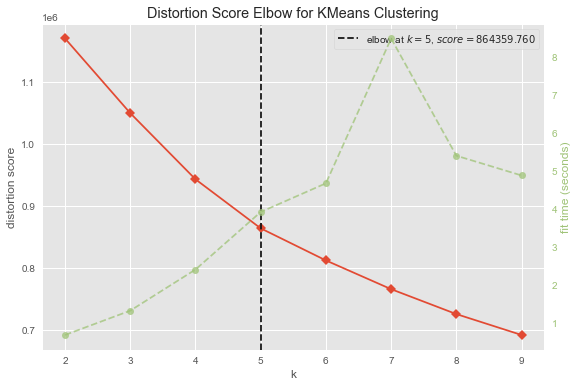

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [367]:
# 14 colonnes
visualizer.fit(X_scaled_yel)    # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [209]:
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'kmeans', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'kmeans__algorithm', 'kmeans__copy_x', 'kmeans__init', 'kmeans__max_iter', 'kmeans__n_clusters', 'kmeans__n_init', 'kmeans__n_jobs', 'kmeans__precompute_distances', 'kmeans__random_state', 'kmeans__tol', 'kmeans__verbose'])

In [ ]:
#visualizer.poof()    # Draw/show/poof the data

In [368]:
model_sil = KMeans(5)
visualizer_sil = SilhouetteVisualizer(model_sil)

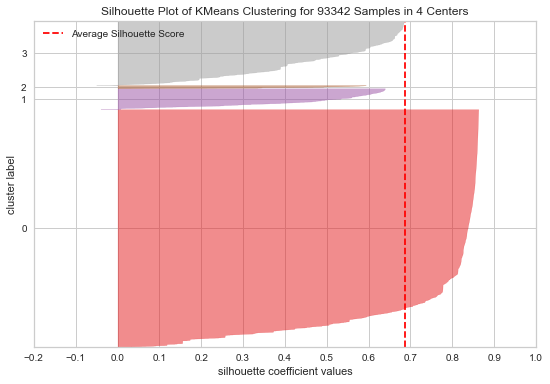

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93342 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [120]:
# 40 clusters
#visualizer_sil.fit(X)    # Fit the data to the visualizer
#visualizer_sil.poof()    # Draw/show/poof the data

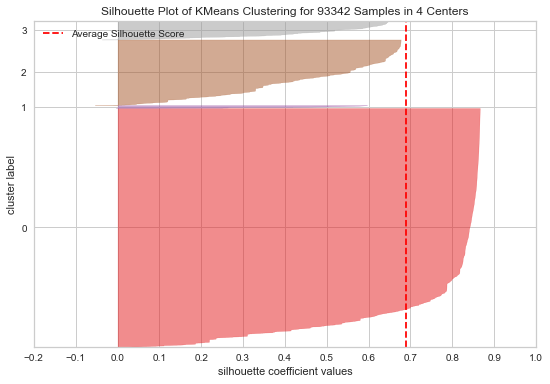

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93342 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [154]:
# 26 colonnes
# visualizer_sil.fit(X)    # Fit the data to the visualizer
# visualizer_sil.poof()    # Draw/show/poof the data

## Visualisation de score de silhouette pour KMeans, k=5

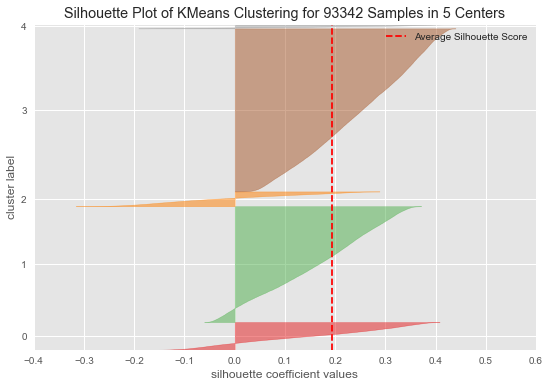

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93342 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [369]:
visualizer_sil.fit(X_scaled_yel)    # Fit the data to the visualizer
visualizer_sil.poof()    # Draw/show/poof the data

# Essaies de différentes valeurs de k pour KMeans 

## Création d'un échantillon de données

In [17]:
# A random 50% sample of the DataFrame
# df.sample(frac=0.5, replace=True, random_state=1)
X_50perc_sample = X.sample(frac=0.5, random_state=1)

## StandardScaler() + kmeans

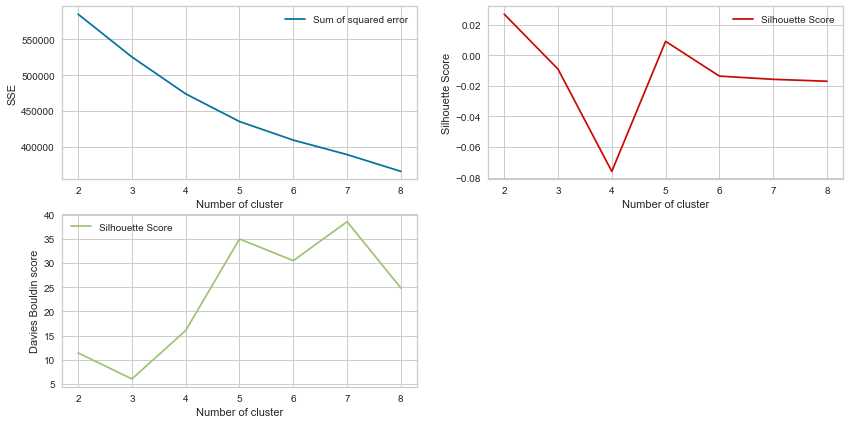

In [246]:
# calcule et affichage de score d'inertie, de silhouette et de Davies Bouldin en fonction de k

df_res_kmeans = pd.DataFrame(columns=['n_clusters', 'inertia', 'silhouette_score', 'davies_bouldin_score'])

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    estimator = make_pipeline(StandardScaler(), kmeans).fit(X_50perc_sample)
    labels_k = kmeans.labels_
    #print(data["clusters"])
    inert = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db_score = davies_bouldin_score(X_50perc_sample, labels_k)
    silh_score = metrics.silhouette_score(X_50perc_sample, labels_k, metric='euclidean')
    df_res_kmeans = df_res_kmeans.append({'n_clusters':k, 'inertia':inert, 'silhouette_score':silh_score,
                                          'davies_bouldin_score':db_score}, ignore_index=True)
df_res_kmeans = df_res_kmeans.set_index('n_clusters')

fig = plt.figure(figsize=(14,7))
fig.add_subplot(221)
plt.plot(df_res_kmeans['inertia'],'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(222)
plt.plot(df_res_kmeans['silhouette_score'],'r-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
fig.add_subplot(223)
plt.plot(df_res_kmeans['davies_bouldin_score'],'g-',label='Score de Davies Bouldin')
plt.xlabel("Number of cluster")
plt.ylabel("Davies Bouldin score")
plt.legend()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.030080044044085933
For n_clusters = 3 The average silhouette_score is : -0.008552454642504207
For n_clusters = 4 The average silhouette_score is : -0.07692368097668668
For n_clusters = 5 The average silhouette_score is : 0.009028424754851022
For n_clusters = 6 The average silhouette_score is : -0.013353587895521055
For n_clusters = 7 The average silhouette_score is : -0.014762383084450147
For n_clusters = 8 The average silhouette_score is : -0.014621534707126663
For n_clusters = 9 The average silhouette_score is : -0.017565520469361565


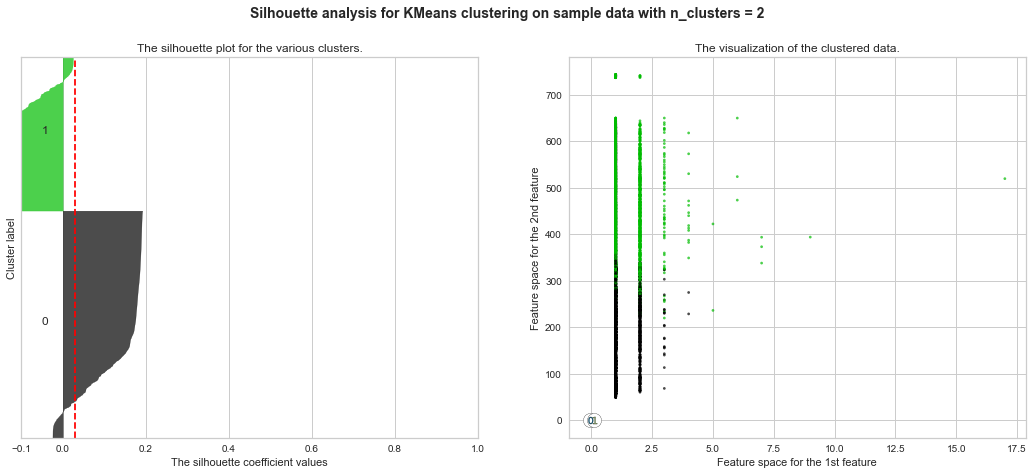

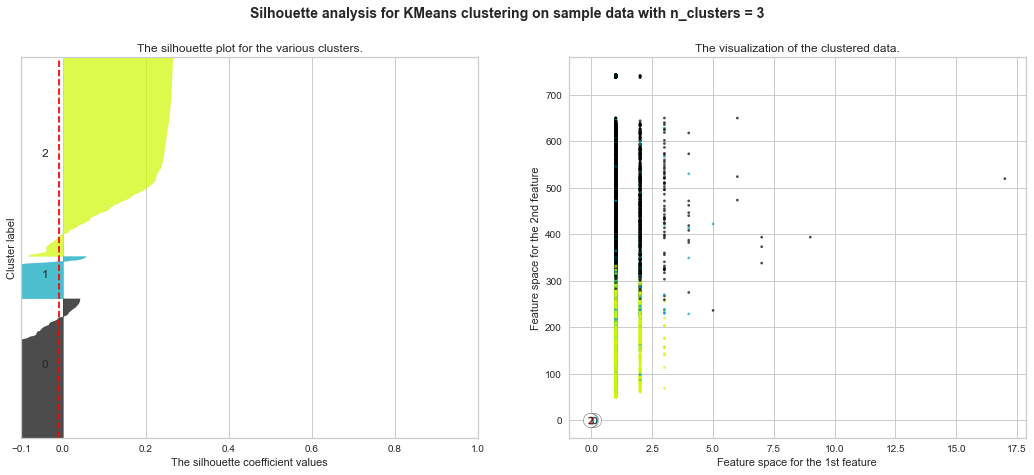

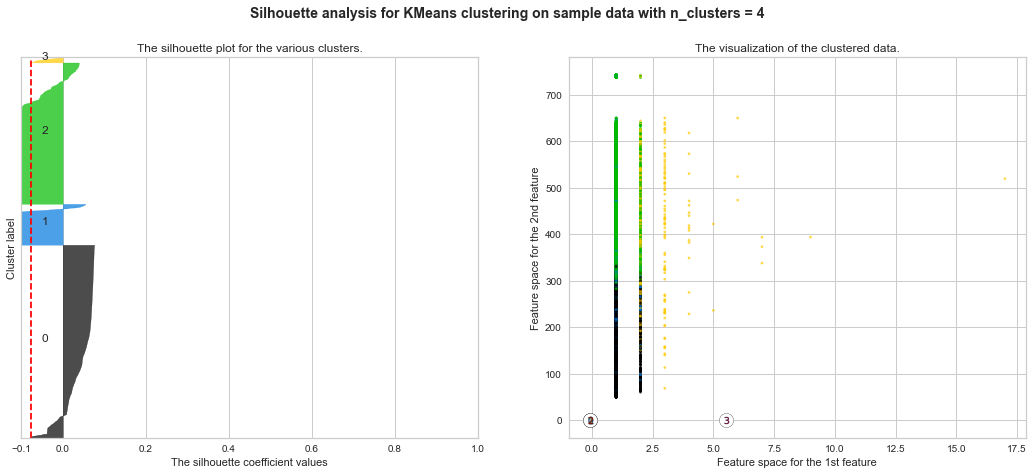

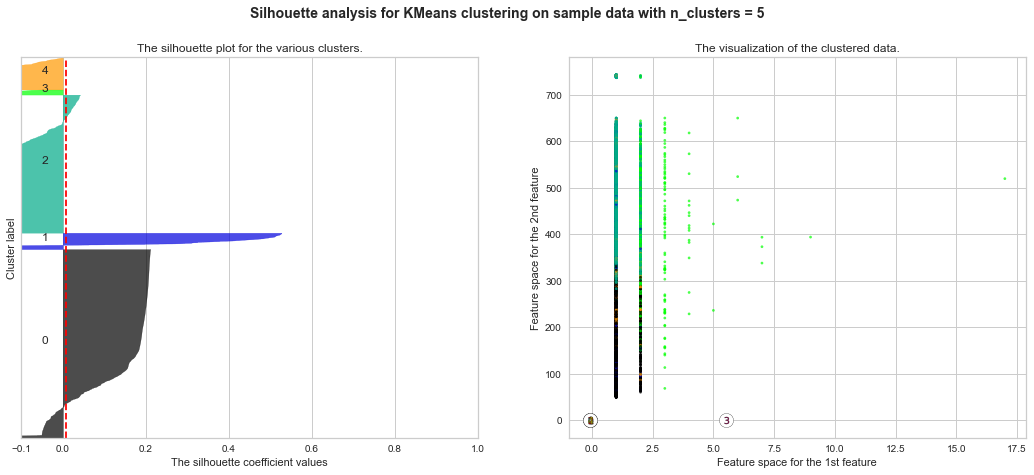

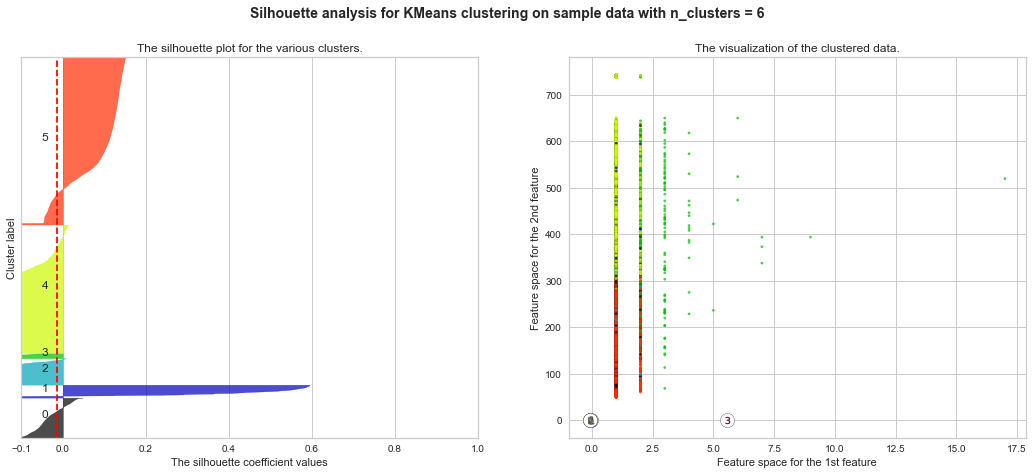

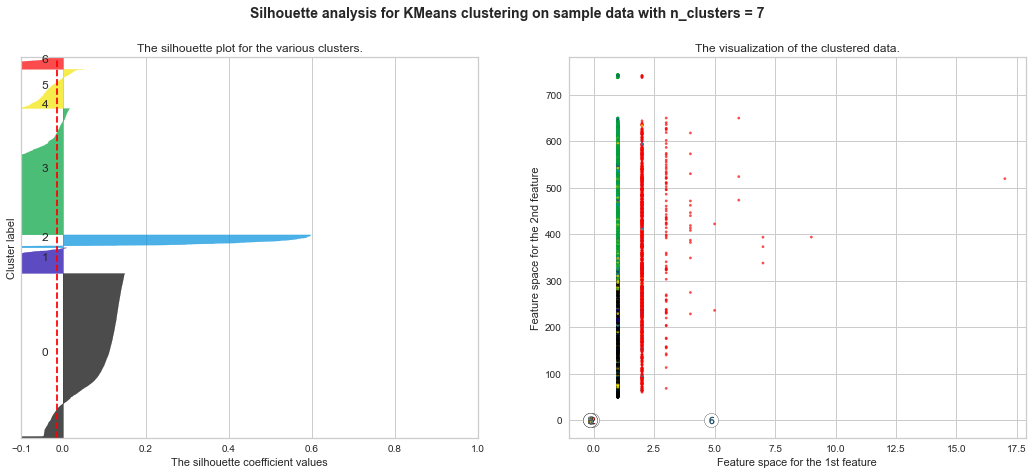

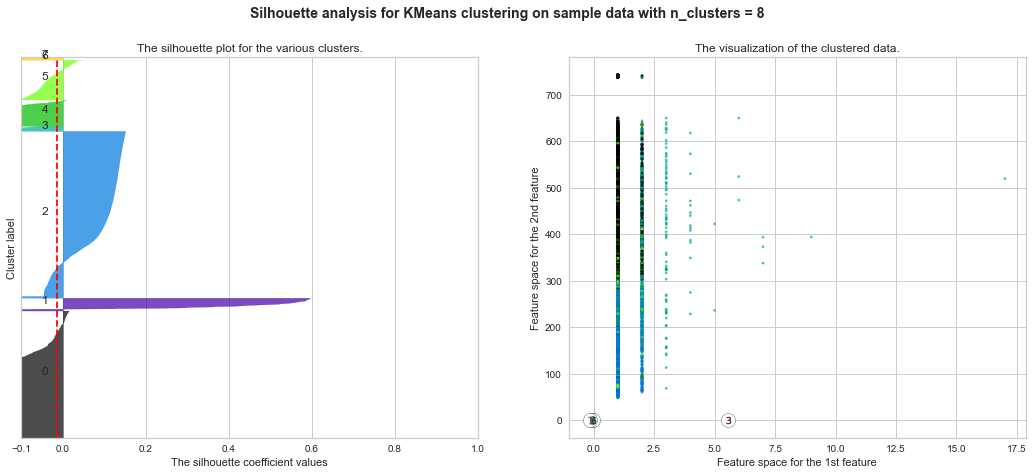

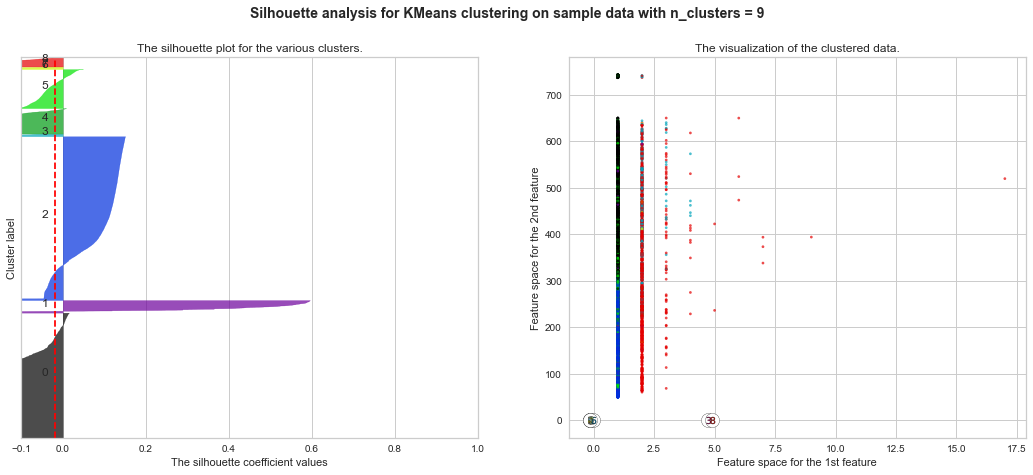

In [247]:
# StandardScaler() + kmeans
# affichage de la forme de la silhouette et des clusters en fonction de k

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_50perc_sample) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    pipeline_kmeans = make_pipeline(StandardScaler(), clusterer)
    cluster_labels = pipeline_kmeans.fit_predict(X_50perc_sample)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_50perc_sample, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_50perc_sample, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_50perc_sample.iloc[:, 0], X_50perc_sample.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Analyse de données avec ACP

In [259]:
# fonction d'affichage des éboulis des valeurs propres

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [260]:
# choix du nombre de composantes à calculer
n_comp = 8

### ACP sur l'échantillon de 50% de dataset

In [261]:
names = X_50perc_sample.index

In [262]:
features = X_50perc_sample.columns

In [263]:
pca = PCA(n_components=n_comp)

In [264]:
pca_fitte = make_pipeline(StandardScaler(), pca).fit(X_50perc_sample)

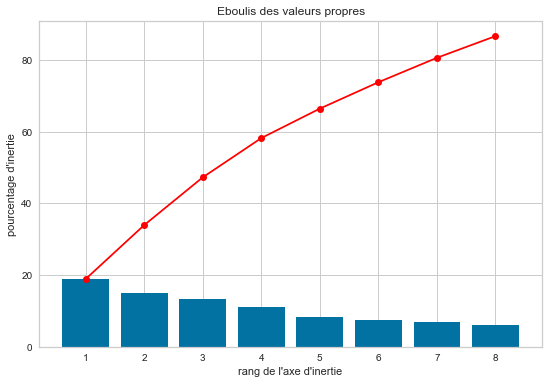

In [256]:
display_scree_plot(pca_fitte[1])

In [266]:
pca.explained_variance_ratio_.cumsum()

array([0.18912957, 0.33958612, 0.47273259, 0.58224509, 0.66436336,
       0.73799883, 0.80610354, 0.86661622])

### ACP sur le dataset entier

In [267]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [268]:
pca.fit(X_scaled)

PCA(n_components=8)

In [269]:
print(pca.explained_variance_ratio_)

[0.19014052 0.15133779 0.13363174 0.11148759 0.08202739 0.0737322
 0.06763584 0.05970635]


In [270]:
print(pca.explained_variance_ratio_.sum())

0.8696994135473005


In [271]:
# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

In [358]:
X.columns

Index(['order_id_nunique', 'delta_date_order_first', 'delta_date_order_last',
       'freight_value_max', 'review_score_min', 'delivery_period_max',
       'product_volume_cm3_most_frequent', 'intime_delivery_mean',
       'intime_delivery_max', 'payment_sequential_mean',
       'payment_installments_mean', 'customer_seller_distance_mean',
       'purchase_frequency_', 'average_consumer_basket_'],
      dtype='object')

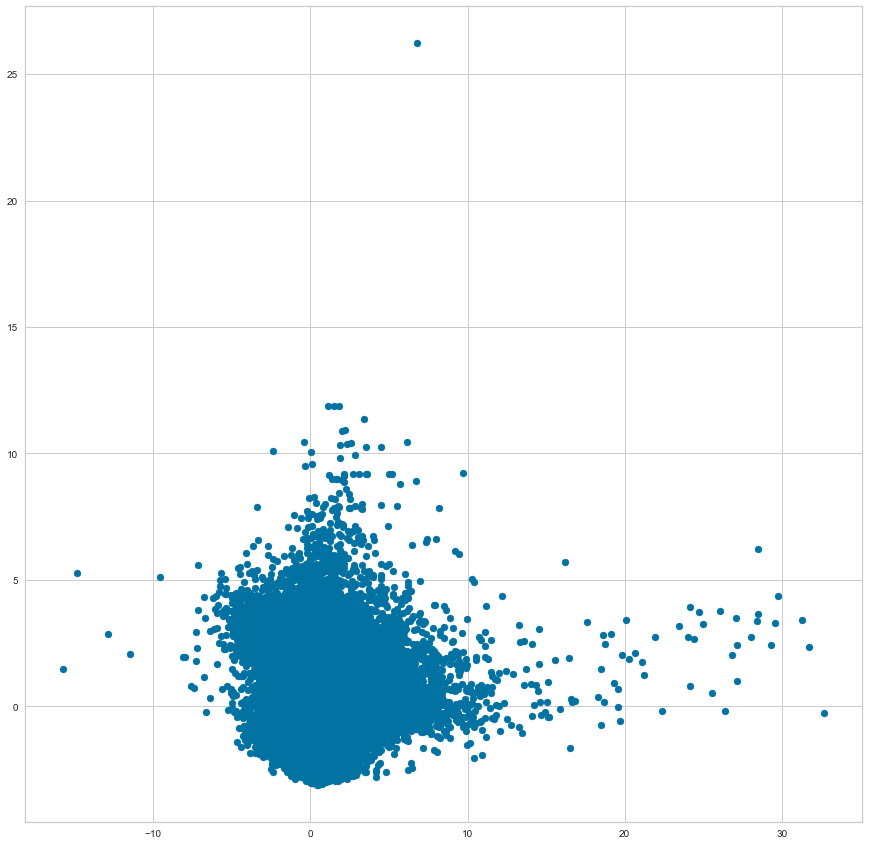

In [280]:
# df_customer_unique['most_frequent_general_product_category_name']
fig = plt.figure(figsize=(15,15))
plt.scatter(X_projected[:, 0], X_projected[:, 1])

In [281]:
pcs = pca.components_

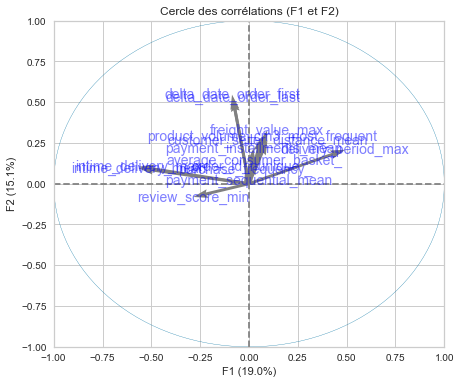

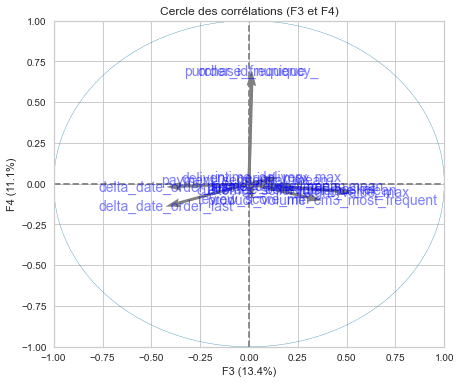

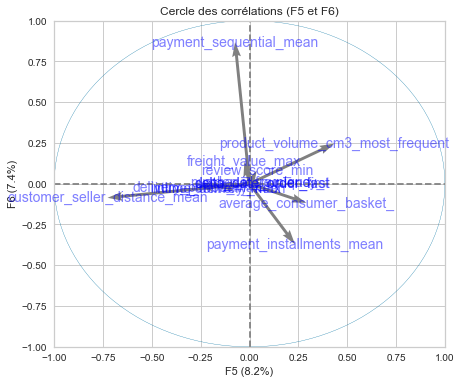

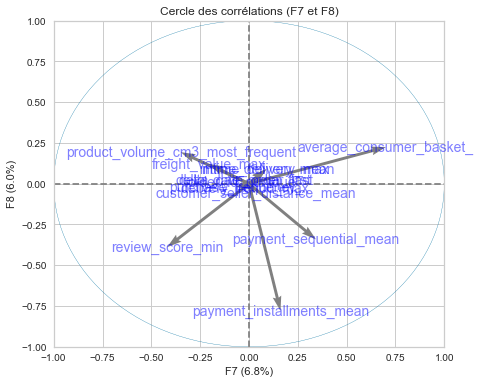

In [293]:
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5),(6,7)], labels = np.array(features))

(-0.7, 0.7)

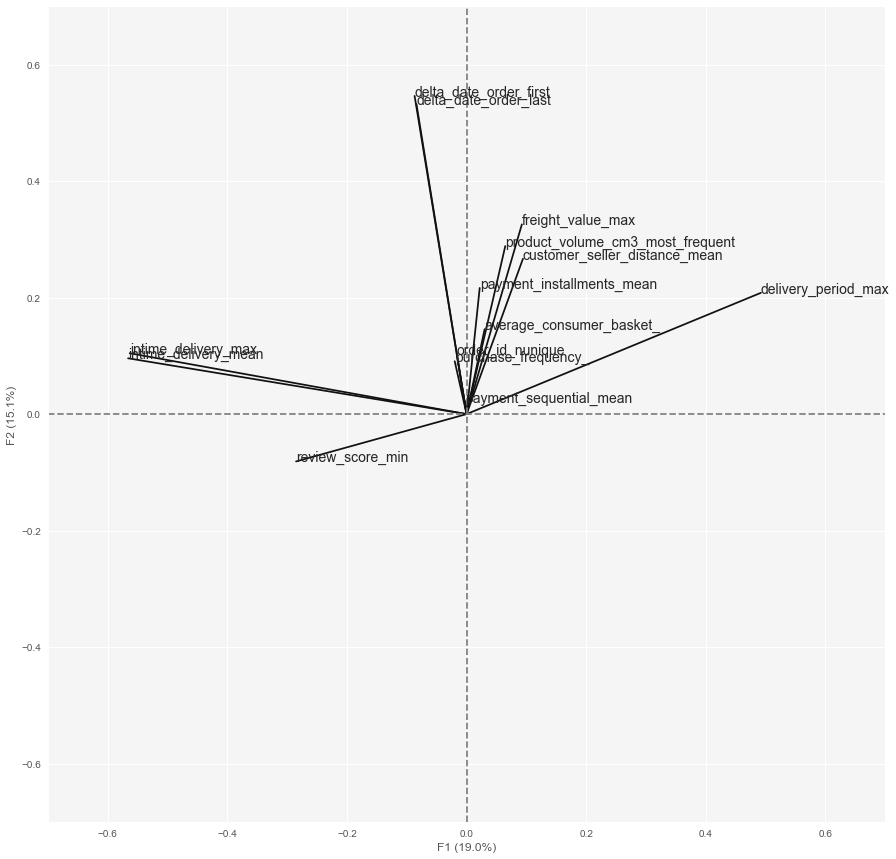

In [359]:
fig = plt.figure(figsize=(15,15))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, X.columns[i], fontsize='14')

    
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(0+1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(1+1, round(100*pca.explained_variance_ratio_[1],1)))

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

(-0.7, 0.7)

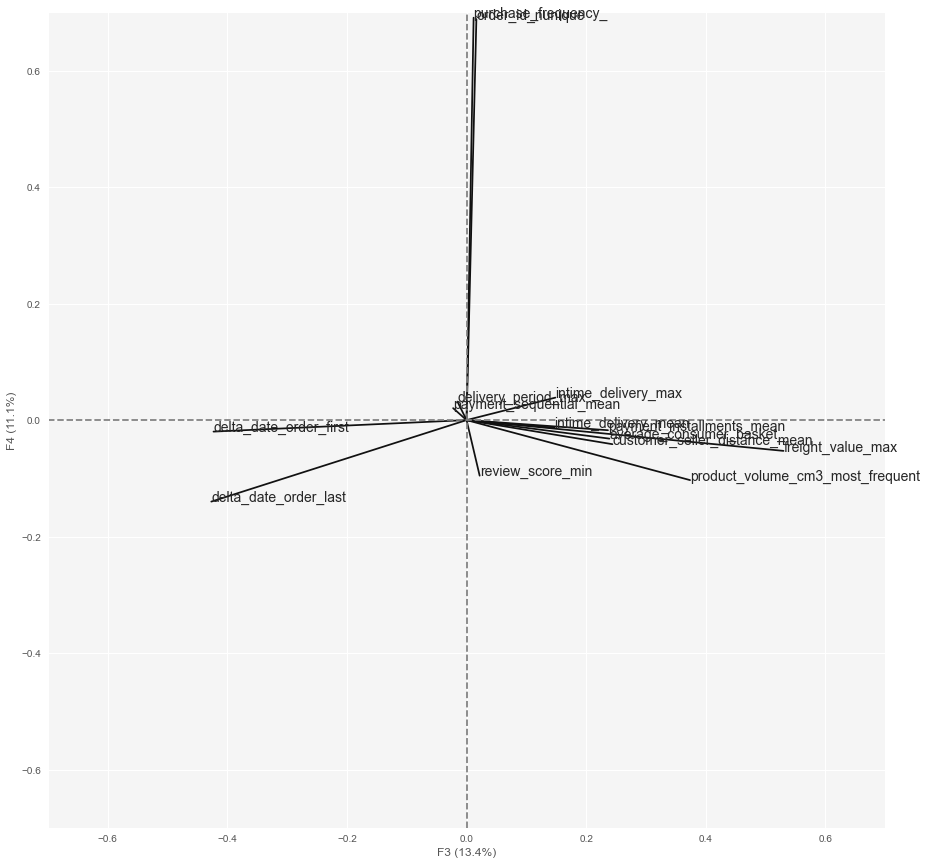

In [360]:
fig = plt.figure(figsize=(15,15))
for i, (x, y) in enumerate(zip(pcs[2, :], pcs[3, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, X.columns[i], fontsize='14')

ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(2+1, round(100*pca.explained_variance_ratio_[2],1)))
plt.ylabel('F{} ({}%)'.format(3+1, round(100*pca.explained_variance_ratio_[3],1)))

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

(-0.7, 0.7)

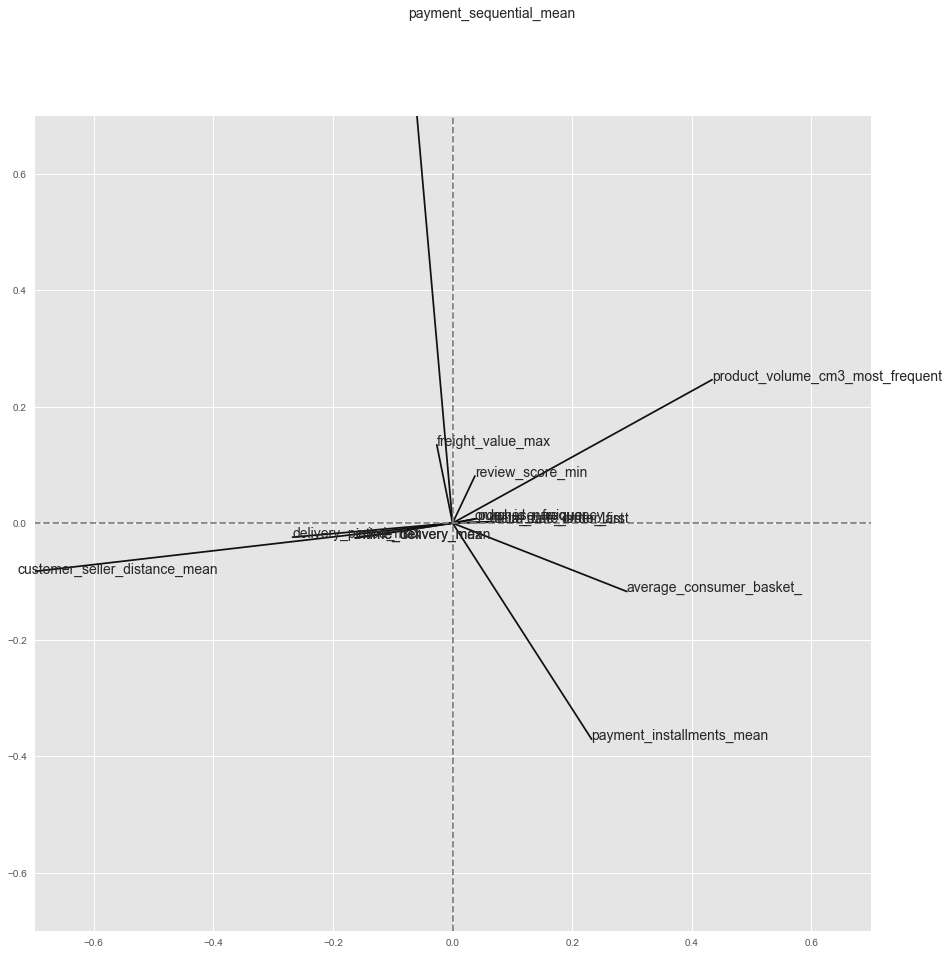

In [361]:
fig = plt.figure(figsize=(15,15))
for i, (x, y) in enumerate(zip(pcs[4, :], pcs[5, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, X.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

In [347]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
            
            colors = ["#000000", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43",
        "#5A0007", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
        "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100"]
 # rose pale "#FFDBE5"
# invisible "#FEFFE6"
# bleu mauve claire "#8FB0FF"
# gris claire  "#997D87", "#809693",

            markers = ['o', 's', '+', 'x', '<', 'D', 'H', 'p', 'd', 'v',
                      'o', 's', '+', 'x', '>', 'D', 'H', 'p', 'd', 'v',
                      'o', 's', '+', 'x', '<', 'D', 'H', 'p', 'd', 'v']
            # initialisation de la figure       
            fig = plt.figure(figsize=(15,15))
            ax = plt.gca()
            ax.set_facecolor('whitesmoke')
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value, c, m in zip(np.unique(illustrative_var), colors, markers):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value,
                                color = c, marker = m)
                    plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

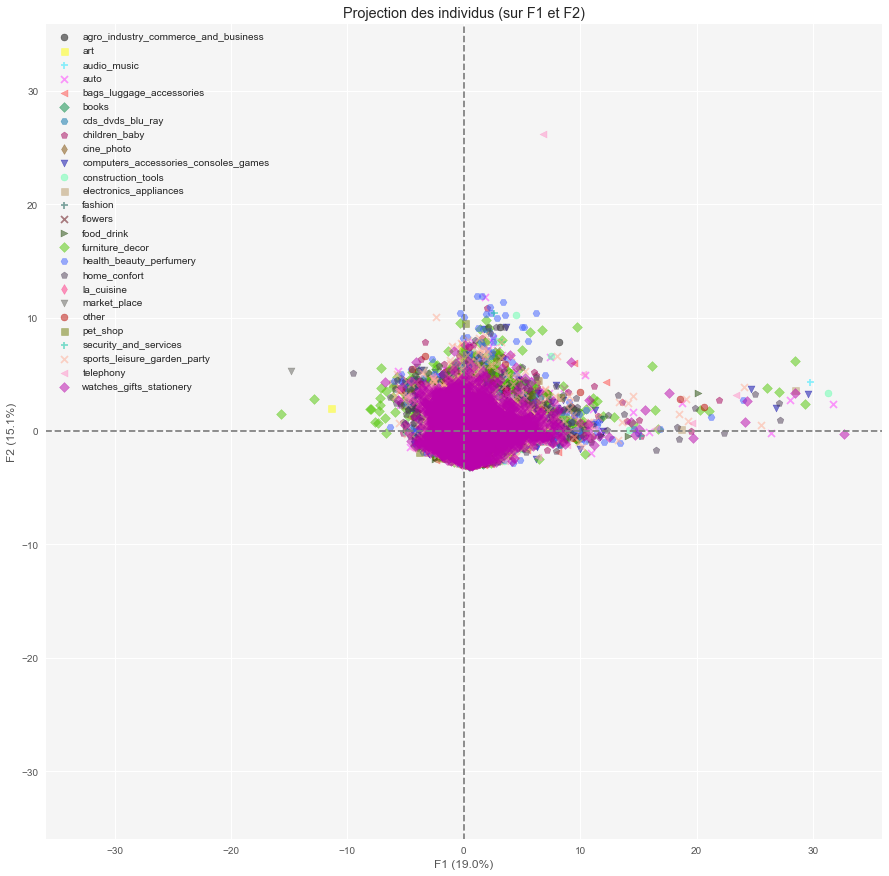

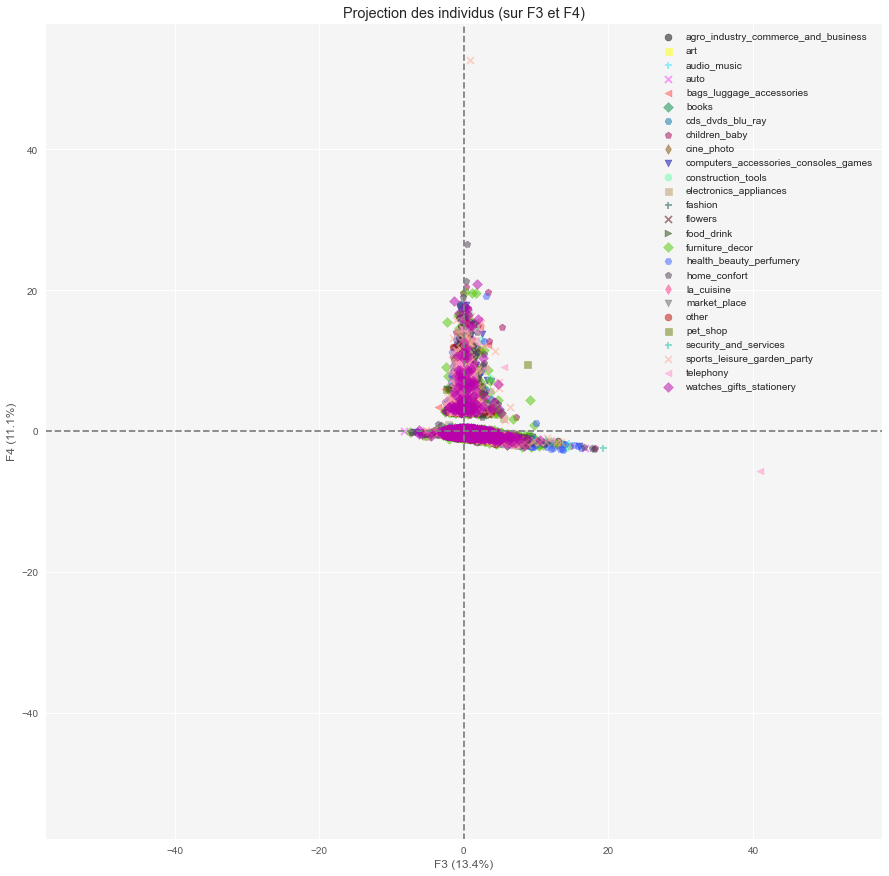

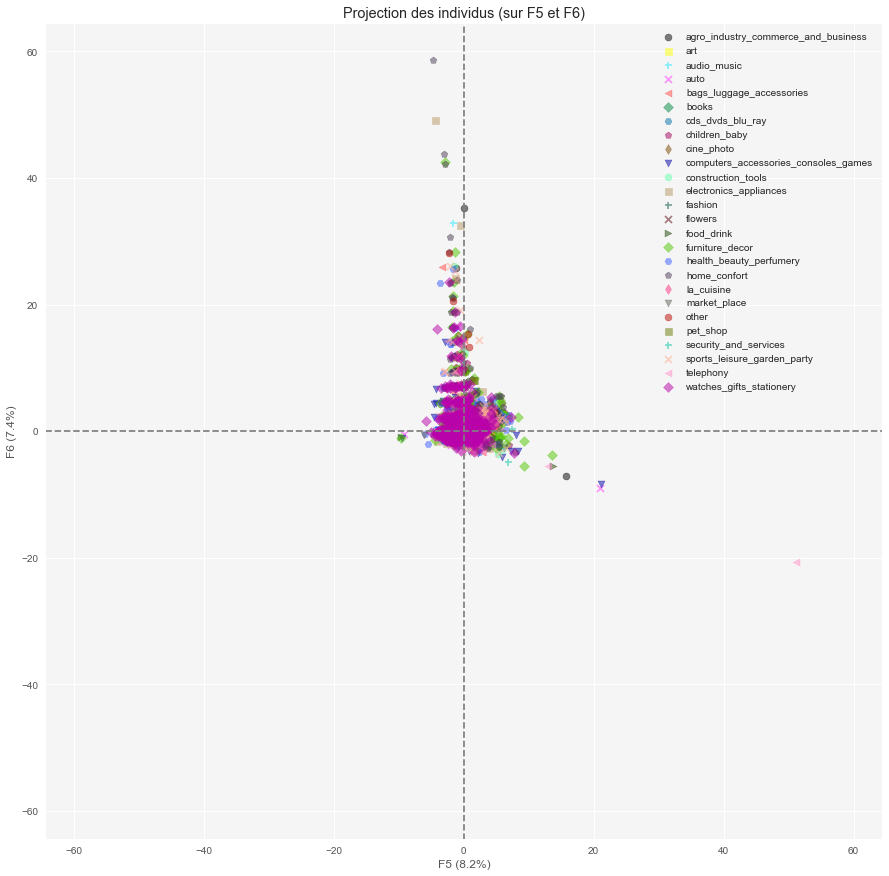

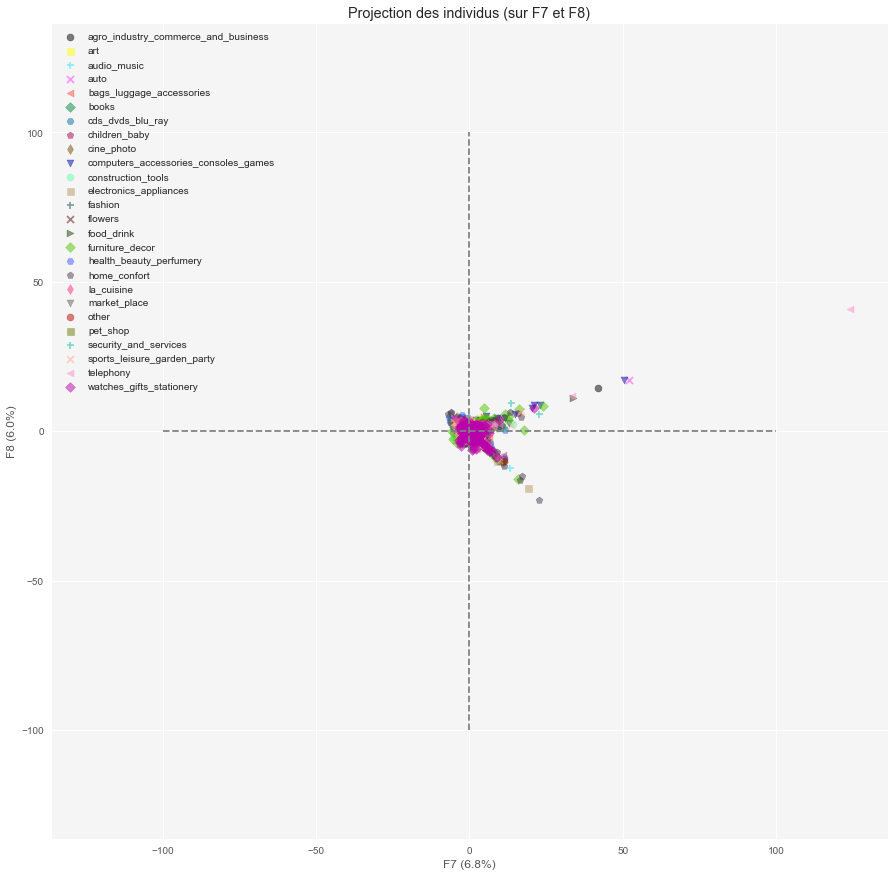

In [348]:
#df_customer_unique['most_frequent_general_product_category_name']
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5),(6,7)], illustrative_var = df_customer_unique["most_frequent_general_product_category_name"], alpha=0.5)
plt.show()

## ACP + KMeans

For n_clusters = 3 The average silhouette_score is : 0.7372274658537247


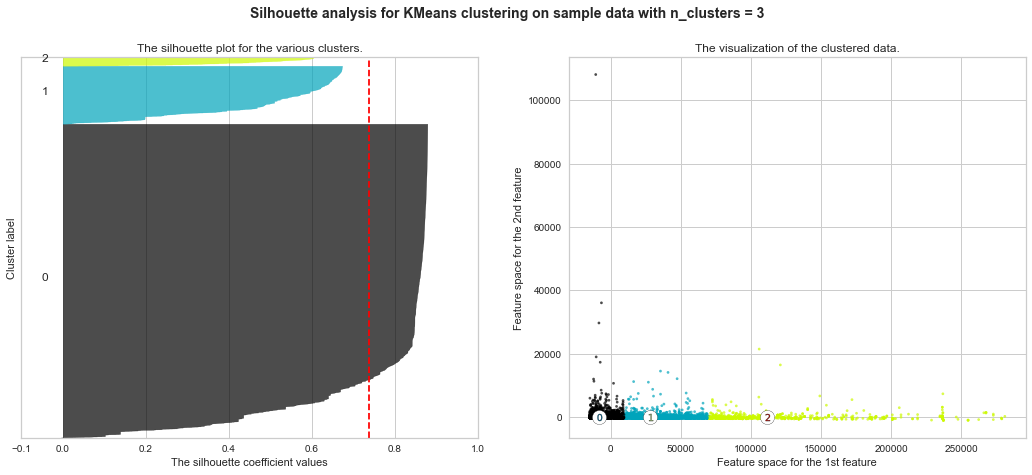

In [24]:
# nombre de composants ACP = 2, nombre de clusters = 3
range_n_clusters = [3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_50perc_sample) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    reduced_data = PCA(n_components=2).fit_transform(X_50perc_sample)
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(reduced_data)
    cluster_labels = kmeans.fit_predict(reduced_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(reduced_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(reduced_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = 3"),
                 fontsize=14, fontweight='bold')

plt.show()

# Affichage des clusters

## Réduction de dimentions par l'ACP

In [239]:
# réduction de dimention pour l'affichage
pca = PCA(2) 
pca_X = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2'])

In [240]:
# clustering de données cintrées-réduites avec StandardScaler()
# k = 3
clusterer_kmeans = KMeans(n_clusters=3)
pipeline_kmeans = make_pipeline(StandardScaler(), clusterer_kmeans)
resultfit_kmeans = pipeline_kmeans.fit(X)

In [241]:
resultfit_kmeans[1]

KMeans(n_clusters=3)

In [242]:
resultfit_kmeans[1].labels_

array([1, 1, 0, ..., 0, 1, 0])

In [243]:
pca_X['cluster'] = pd.Categorical(resultfit_kmeans[1].labels_)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

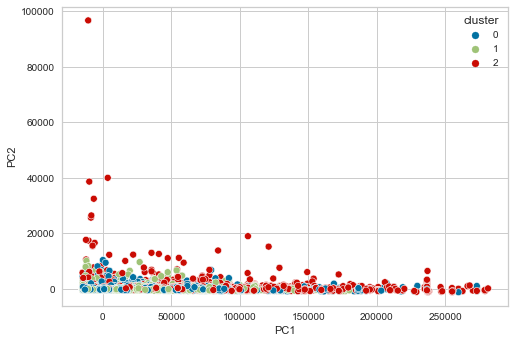

In [244]:
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_X)

## Réduction de dimentions par tSNE

0 -----
1 -----
2 -----
3 -----
4 -----
5 -----
6 -----
7 -----
8 -----
9 -----
10 -----
11 -----
12 -----
13 -----
14 -----
15 -----
16 -----
17 -----
18 -----
19 -----
20 -----
21 -----
22 -----
23 -----
24 -----
25 -----
26 -----
27 -----
28 -----
29 -----
30 -----
31 -----
32 -----
33 -----
34 -----
35 -----
36 -----
37 -----
38 -----
39 -----
40 -----
41 -----
42 -----
43 -----
44 -----
45 -----
46 -----
47 -----
48 -----
49 -----
50 -----
51 -----
52 -----
53 -----
54 -----
55 -----
56 -----
57 -----
58 -----
59 -----
60 -----
61 -----
62 -----
63 -----
64 -----
65 -----
66 -----
67 -----
68 -----
69 -----
70 -----
71 -----
72 -----
73 -----
74 -----
75 -----
76 -----
77 -----
78 -----
79 -----
80 -----
81 -----
82 -----
83 -----
84 -----
85 -----
86 -----
87 -----
88 -----
89 -----
90 -----
91 -----
92 -----
93 -----
94 -----
95 -----
96 -----
97 -----
98 -----
99 -----
100 -----
101 -----
102 -----
103 -----
104 -----
105 -----
106 -----
107 -----
108 -----
109 -----
110 -----


842 -----
843 -----
844 -----
845 -----
846 -----
847 -----
848 -----
849 -----
850 -----
851 -----
852 -----
853 -----
854 -----
855 -----
856 -----
857 -----
858 -----
859 -----
860 -----
861 -----
862 -----
863 -----
864 -----
865 -----
866 -----
867 -----
868 -----
869 -----
870 -----
871 -----
872 -----
873 -----
874 -----
875 -----
876 -----
877 -----
878 -----
879 -----
880 -----
881 -----
882 -----
883 -----
884 -----
885 -----
886 -----
887 -----
888 -----
889 -----
890 -----
891 -----
892 -----
893 -----
894 -----
895 -----
896 -----
897 -----
898 -----
899 -----
900 -----
901 -----
902 -----
903 -----
904 -----
905 -----
906 -----
907 -----
908 -----
909 -----
910 -----
911 -----
912 -----
913 -----
914 -----
915 -----
916 -----
917 -----
918 -----
919 -----
920 -----
921 -----
922 -----
923 -----
924 -----
925 -----
926 -----
927 -----
928 -----
929 -----
930 -----
931 -----
932 -----
933 -----
934 -----
935 -----
936 -----
937 -----
938 -----
939 -----
940 -----
941 -----


1718 -----
1719 -----
1720 -----
1721 -----
1722 -----
1723 -----
1724 -----
1725 -----
1726 -----
1727 -----
1728 -----
1729 -----
1730 -----
1731 -----
1732 -----
1733 -----
1734 -----
1735 -----
1736 -----
1737 -----
1738 -----
1739 -----
1740 -----
1741 -----
1742 -----
1743 -----
1744 -----
1745 -----
1746 -----
1747 -----
1748 -----
1749 -----
1750 -----
1751 -----
1752 -----
1753 -----
1754 -----
1755 -----
1756 -----
1757 -----
1758 -----
1759 -----
1760 -----
1761 -----
1762 -----
1763 -----
1764 -----
1765 -----
1766 -----
1767 -----
1768 -----
1769 -----
1770 -----
1771 -----
1772 -----
1773 -----
1774 -----
1775 -----
1776 -----
1777 -----
1778 -----
1779 -----
1780 -----
1781 -----
1782 -----
1783 -----
1784 -----
1785 -----
1786 -----
1787 -----
1788 -----
1789 -----
1790 -----
1791 -----
1792 -----
1793 -----
1794 -----
1795 -----
1796 -----
1797 -----
1798 -----
1799 -----
1800 -----
1801 -----
1802 -----
1803 -----
1804 -----
1805 -----
1806 -----
1807 -----
1808 -----

2599 -----
2600 -----
2601 -----
2602 -----
2603 -----
2604 -----
2605 -----
2606 -----
2607 -----
2608 -----
2609 -----
2610 -----
2611 -----
2612 -----
2613 -----
2614 -----
2615 -----
2616 -----
2617 -----
2618 -----
2619 -----
2620 -----
2621 -----
2622 -----
2623 -----
2624 -----
2625 -----
2626 -----
2627 -----
2628 -----
2629 -----
2630 -----
2631 -----
2632 -----
2633 -----
2634 -----
2635 -----
2636 -----
2637 -----
2638 -----
2639 -----
2640 -----
2641 -----
2642 -----
2643 -----
2644 -----
2645 -----
2646 -----
2647 -----
2648 -----
2649 -----
2650 -----
2651 -----
2652 -----
2653 -----
2654 -----
2655 -----
2656 -----
2657 -----
2658 -----
2659 -----
2660 -----
2661 -----
2662 -----
2663 -----
2664 -----
2665 -----
2666 -----
2667 -----
2668 -----
2669 -----
2670 -----
2671 -----
2672 -----
2673 -----
2674 -----
2675 -----
2676 -----
2677 -----
2678 -----
2679 -----
2680 -----
2681 -----
2682 -----
2683 -----
2684 -----
2685 -----
2686 -----
2687 -----
2688 -----
2689 -----

3485 -----
3486 -----
3487 -----
3488 -----
3489 -----
3490 -----
3491 -----
3492 -----
3493 -----
3494 -----
3495 -----
3496 -----
3497 -----
3498 -----
3499 -----
3500 -----
3501 -----
3502 -----
3503 -----
3504 -----
3505 -----
3506 -----
3507 -----
3508 -----
3509 -----
3510 -----
3511 -----
3512 -----
3513 -----
3514 -----
3515 -----
3516 -----
3517 -----
3518 -----
3519 -----
3520 -----
3521 -----
3522 -----
3523 -----
3524 -----
3525 -----
3526 -----
3527 -----
3528 -----
3529 -----
3530 -----
3531 -----
3532 -----
3533 -----
3534 -----
3535 -----
3536 -----
3537 -----
3538 -----
3539 -----
3540 -----
3541 -----
3542 -----
3543 -----
3544 -----
3545 -----
3546 -----
3547 -----
3548 -----
3549 -----
3550 -----
3551 -----
3552 -----
3553 -----
3554 -----
3555 -----
3556 -----
3557 -----
3558 -----
3559 -----
3560 -----
3561 -----
3562 -----
3563 -----
3564 -----
3565 -----
3566 -----
3567 -----
3568 -----
3569 -----
3570 -----
3571 -----
3572 -----
3573 -----
3574 -----
3575 -----

4388 -----
4389 -----
4390 -----
4391 -----
4392 -----
4393 -----
4394 -----
4395 -----
4396 -----
4397 -----
4398 -----
4399 -----
4400 -----
4401 -----
4402 -----
4403 -----
4404 -----
4405 -----
4406 -----
4407 -----
4408 -----
4409 -----
4410 -----
4411 -----
4412 -----
4413 -----
4414 -----
4415 -----
4416 -----
4417 -----
4418 -----
4419 -----
4420 -----
4421 -----
4422 -----
4423 -----
4424 -----
4425 -----
4426 -----
4427 -----
4428 -----
4429 -----
4430 -----
4431 -----
4432 -----
4433 -----
4434 -----
4435 -----
4436 -----
4437 -----
4438 -----
4439 -----
4440 -----
4441 -----
4442 -----
4443 -----
4444 -----
4445 -----
4446 -----
4447 -----
4448 -----
4449 -----
4450 -----
4451 -----
4452 -----
4453 -----
4454 -----
4455 -----
4456 -----
4457 -----
4458 -----
4459 -----
4460 -----
4461 -----
4462 -----
4463 -----
4464 -----
4465 -----
4466 -----
4467 -----
4468 -----
4469 -----
4470 -----
4471 -----
4472 -----
4473 -----
4474 -----
4475 -----
4476 -----
4477 -----
4478 -----

5288 -----
5289 -----
5290 -----
5291 -----
5292 -----
5293 -----
5294 -----
5295 -----
5296 -----
5297 -----
5298 -----
5299 -----
5300 -----
5301 -----
5302 -----
5303 -----
5304 -----
5305 -----
5306 -----
5307 -----
5308 -----
5309 -----
5310 -----
5311 -----
5312 -----
5313 -----
5314 -----
5315 -----
5316 -----
5317 -----
5318 -----
5319 -----
5320 -----
5321 -----
5322 -----
5323 -----
5324 -----
5325 -----
5326 -----
5327 -----
5328 -----
5329 -----
5330 -----
5331 -----
5332 -----
5333 -----
5334 -----
5335 -----
5336 -----
5337 -----
5338 -----
5339 -----
5340 -----
5341 -----
5342 -----
5343 -----
5344 -----
5345 -----
5346 -----
5347 -----
5348 -----
5349 -----
5350 -----
5351 -----
5352 -----
5353 -----
5354 -----
5355 -----
5356 -----
5357 -----
5358 -----
5359 -----
5360 -----
5361 -----
5362 -----
5363 -----
5364 -----
5365 -----
5366 -----
5367 -----
5368 -----
5369 -----
5370 -----
5371 -----
5372 -----
5373 -----
5374 -----
5375 -----
5376 -----
5377 -----
5378 -----

6063 -----
6064 -----
6065 -----
6066 -----
6067 -----
6068 -----
6069 -----
6070 -----
6071 -----
6072 -----
6073 -----
6074 -----
6075 -----
6076 -----
6077 -----
6078 -----
6079 -----
6080 -----
6081 -----
6082 -----
6083 -----
6084 -----
6085 -----
6086 -----
6087 -----
6088 -----
6089 -----
6090 -----
6091 -----
6092 -----
6093 -----
6094 -----
6095 -----
6096 -----
6097 -----
6098 -----
6099 -----
6100 -----
6101 -----
6102 -----
6103 -----
6104 -----
6105 -----
6106 -----
6107 -----
6108 -----
6109 -----
6110 -----
6111 -----
6112 -----
6113 -----
6114 -----
6115 -----
6116 -----
6117 -----
6118 -----
6119 -----
6120 -----
6121 -----
6122 -----
6123 -----
6124 -----
6125 -----
6126 -----
6127 -----
6128 -----
6129 -----
6130 -----
6131 -----
6132 -----
6133 -----
6134 -----
6135 -----
6136 -----
6137 -----
6138 -----
6139 -----
6140 -----
6141 -----
6142 -----
6143 -----
6144 -----
6145 -----
6146 -----
6147 -----
6148 -----
6149 -----
6150 -----
6151 -----
6152 -----
6153 -----

6836 -----
6837 -----
6838 -----
6839 -----
6840 -----
6841 -----
6842 -----
6843 -----
6844 -----
6845 -----
6846 -----
6847 -----
6848 -----
6849 -----
6850 -----
6851 -----
6852 -----
6853 -----
6854 -----
6855 -----
6856 -----
6857 -----
6858 -----
6859 -----
6860 -----
6861 -----
6862 -----
6863 -----
6864 -----
6865 -----
6866 -----
6867 -----
6868 -----
6869 -----
6870 -----
6871 -----
6872 -----
6873 -----
6874 -----
6875 -----
6876 -----
6877 -----
6878 -----
6879 -----
6880 -----
6881 -----
6882 -----
6883 -----
6884 -----
6885 -----
6886 -----
6887 -----
6888 -----
6889 -----
6890 -----
6891 -----
6892 -----
6893 -----
6894 -----
6895 -----
6896 -----
6897 -----
6898 -----
6899 -----
6900 -----
6901 -----
6902 -----
6903 -----
6904 -----
6905 -----
6906 -----
6907 -----
6908 -----
6909 -----
6910 -----
6911 -----
6912 -----
6913 -----
6914 -----
6915 -----
6916 -----
6917 -----
6918 -----
6919 -----
6920 -----
6921 -----
6922 -----
6923 -----
6924 -----
6925 -----
6926 -----

7842 -----
7843 -----
7844 -----
7845 -----
7846 -----
7847 -----
7848 -----
7849 -----
7850 -----
7851 -----
7852 -----
7853 -----
7854 -----
7855 -----
7856 -----
7857 -----
7858 -----
7859 -----
7860 -----
7861 -----
7862 -----
7863 -----
7864 -----
7865 -----
7866 -----
7867 -----
7868 -----
7869 -----
7870 -----
7871 -----
7872 -----
7873 -----
7874 -----
7875 -----
7876 -----
7877 -----
7878 -----
7879 -----
7880 -----
7881 -----
7882 -----
7883 -----
7884 -----
7885 -----
7886 -----
7887 -----
7888 -----
7889 -----
7890 -----
7891 -----
7892 -----
7893 -----
7894 -----
7895 -----
7896 -----
7897 -----
7898 -----
7899 -----
7900 -----
7901 -----
7902 -----
7903 -----
7904 -----
7905 -----
7906 -----
7907 -----
7908 -----
7909 -----
7910 -----
7911 -----
7912 -----
7913 -----
7914 -----
7915 -----
7916 -----
7917 -----
7918 -----
7919 -----
7920 -----
7921 -----
7922 -----
7923 -----
7924 -----
7925 -----
7926 -----
7927 -----
7928 -----
7929 -----
7930 -----
7931 -----
7932 -----

8799 -----
8800 -----
8801 -----
8802 -----
8803 -----
8804 -----
8805 -----
8806 -----
8807 -----
8808 -----
8809 -----
8810 -----
8811 -----
8812 -----
8813 -----
8814 -----
8815 -----
8816 -----
8817 -----
8818 -----
8819 -----
8820 -----
8821 -----
8822 -----
8823 -----
8824 -----
8825 -----
8826 -----
8827 -----
8828 -----
8829 -----
8830 -----
8831 -----
8832 -----
8833 -----
8834 -----
8835 -----
8836 -----
8837 -----
8838 -----
8839 -----
8840 -----
8841 -----
8842 -----
8843 -----
8844 -----
8845 -----
8846 -----
8847 -----
8848 -----
8849 -----
8850 -----
8851 -----
8852 -----
8853 -----
8854 -----
8855 -----
8856 -----
8857 -----
8858 -----
8859 -----
8860 -----
8861 -----
8862 -----
8863 -----
8864 -----
8865 -----
8866 -----
8867 -----
8868 -----
8869 -----
8870 -----
8871 -----
8872 -----
8873 -----
8874 -----
8875 -----
8876 -----
8877 -----
8878 -----
8879 -----
8880 -----
8881 -----
8882 -----
8883 -----
8884 -----
8885 -----
8886 -----
8887 -----
8888 -----
8889 -----

9720 -----
9721 -----
9722 -----
9723 -----
9724 -----
9725 -----
9726 -----
9727 -----
9728 -----
9729 -----
9730 -----
9731 -----
9732 -----
9733 -----
9734 -----
9735 -----
9736 -----
9737 -----
9738 -----
9739 -----
9740 -----
9741 -----
9742 -----
9743 -----
9744 -----
9745 -----
9746 -----
9747 -----
9748 -----
9749 -----
9750 -----
9751 -----
9752 -----
9753 -----
9754 -----
9755 -----
9756 -----
9757 -----
9758 -----
9759 -----
9760 -----
9761 -----
9762 -----
9763 -----
9764 -----
9765 -----
9766 -----
9767 -----
9768 -----
9769 -----
9770 -----
9771 -----
9772 -----
9773 -----
9774 -----
9775 -----
9776 -----
9777 -----
9778 -----
9779 -----
9780 -----
9781 -----
9782 -----
9783 -----
9784 -----
9785 -----
9786 -----
9787 -----
9788 -----
9789 -----
9790 -----
9791 -----
9792 -----
9793 -----
9794 -----
9795 -----
9796 -----
9797 -----
9798 -----
9799 -----
9800 -----
9801 -----
9802 -----
9803 -----
9804 -----
9805 -----
9806 -----
9807 -----
9808 -----
9809 -----
9810 -----

10618 -----
10619 -----
10620 -----
10621 -----
10622 -----
10623 -----
10624 -----
10625 -----
10626 -----
10627 -----
10628 -----
10629 -----
10630 -----
10631 -----
10632 -----
10633 -----
10634 -----
10635 -----
10636 -----
10637 -----
10638 -----
10639 -----
10640 -----
10641 -----
10642 -----
10643 -----
10644 -----
10645 -----
10646 -----
10647 -----
10648 -----
10649 -----
10650 -----
10651 -----
10652 -----
10653 -----
10654 -----
10655 -----
10656 -----
10657 -----
10658 -----
10659 -----
10660 -----
10661 -----
10662 -----
10663 -----
10664 -----
10665 -----
10666 -----
10667 -----
10668 -----
10669 -----
10670 -----
10671 -----
10672 -----
10673 -----
10674 -----
10675 -----
10676 -----
10677 -----
10678 -----
10679 -----
10680 -----
10681 -----
10682 -----
10683 -----
10684 -----
10685 -----
10686 -----
10687 -----
10688 -----
10689 -----
10690 -----
10691 -----
10692 -----
10693 -----
10694 -----
10695 -----
10696 -----
10697 -----
10698 -----
10699 -----
10700 -----
1070

11535 -----
11536 -----
11537 -----
11538 -----
11539 -----
11540 -----
11541 -----
11542 -----
11543 -----
11544 -----
11545 -----
11546 -----
11547 -----
11548 -----
11549 -----
11550 -----
11551 -----
11552 -----
11553 -----
11554 -----
11555 -----
11556 -----
11557 -----
11558 -----
11559 -----
11560 -----
11561 -----
11562 -----
11563 -----
11564 -----
11565 -----
11566 -----
11567 -----
11568 -----
11569 -----
11570 -----
11571 -----
11572 -----
11573 -----
11574 -----
11575 -----
11576 -----
11577 -----
11578 -----
11579 -----
11580 -----
11581 -----
11582 -----
11583 -----
11584 -----
11585 -----
11586 -----
11587 -----
11588 -----
11589 -----
11590 -----
11591 -----
11592 -----
11593 -----
11594 -----
11595 -----
11596 -----
11597 -----
11598 -----
11599 -----
11600 -----
11601 -----
11602 -----
11603 -----
11604 -----
11605 -----
11606 -----
11607 -----
11608 -----
11609 -----
11610 -----
11611 -----
11612 -----
11613 -----
11614 -----
11615 -----
11616 -----
11617 -----
1161

12428 -----
12429 -----
12430 -----
12431 -----
12432 -----
12433 -----
12434 -----
12435 -----
12436 -----
12437 -----
12438 -----
12439 -----
12440 -----
12441 -----
12442 -----
12443 -----
12444 -----
12445 -----
12446 -----
12447 -----
12448 -----
12449 -----
12450 -----
12451 -----
12452 -----
12453 -----
12454 -----
12455 -----
12456 -----
12457 -----
12458 -----
12459 -----
12460 -----
12461 -----
12462 -----
12463 -----
12464 -----
12465 -----
12466 -----
12467 -----
12468 -----
12469 -----
12470 -----
12471 -----
12472 -----
12473 -----
12474 -----
12475 -----
12476 -----
12477 -----
12478 -----
12479 -----
12480 -----
12481 -----
12482 -----
12483 -----
12484 -----
12485 -----
12486 -----
12487 -----
12488 -----
12489 -----
12490 -----
12491 -----
12492 -----
12493 -----
12494 -----
12495 -----
12496 -----
12497 -----
12498 -----
12499 -----
12500 -----
12501 -----
12502 -----
12503 -----
12504 -----
12505 -----
12506 -----
12507 -----
12508 -----
12509 -----
12510 -----
1251

13166 -----
13167 -----
13168 -----
13169 -----
13170 -----
13171 -----
13172 -----
13173 -----
13174 -----
13175 -----
13176 -----
13177 -----
13178 -----
13179 -----
13180 -----
13181 -----
13182 -----
13183 -----
13184 -----
13185 -----
13186 -----
13187 -----
13188 -----
13189 -----
13190 -----
13191 -----
13192 -----
13193 -----
13194 -----
13195 -----
13196 -----
13197 -----
13198 -----
13199 -----
13200 -----
13201 -----
13202 -----
13203 -----
13204 -----
13205 -----
13206 -----
13207 -----
13208 -----
13209 -----
13210 -----
13211 -----
13212 -----
13213 -----
13214 -----
13215 -----
13216 -----
13217 -----
13218 -----
13219 -----
13220 -----
13221 -----
13222 -----
13223 -----
13224 -----
13225 -----
13226 -----
13227 -----
13228 -----
13229 -----
13230 -----
13231 -----
13232 -----
13233 -----
13234 -----
13235 -----
13236 -----
13237 -----
13238 -----
13239 -----
13240 -----
13241 -----
13242 -----
13243 -----
13244 -----
13245 -----
13246 -----
13247 -----
13248 -----
1324

13880 -----
13881 -----
13882 -----
13883 -----
13884 -----
13885 -----
13886 -----
13887 -----
13888 -----
13889 -----
13890 -----
13891 -----
13892 -----
13893 -----
13894 -----
13895 -----
13896 -----
13897 -----
13898 -----
13899 -----
13900 -----
13901 -----
13902 -----
13903 -----
13904 -----
13905 -----
13906 -----
13907 -----
13908 -----
13909 -----
13910 -----
13911 -----
13912 -----
13913 -----
13914 -----
13915 -----
13916 -----
13917 -----
13918 -----
13919 -----
13920 -----
13921 -----
13922 -----
13923 -----
13924 -----
13925 -----
13926 -----
13927 -----
13928 -----
13929 -----
13930 -----
13931 -----
13932 -----
13933 -----
13934 -----
13935 -----
13936 -----
13937 -----
13938 -----
13939 -----
13940 -----
13941 -----
13942 -----
13943 -----
13944 -----
13945 -----
13946 -----
13947 -----
13948 -----
13949 -----
13950 -----
13951 -----
13952 -----
13953 -----
13954 -----
13955 -----
13956 -----
13957 -----
13958 -----
13959 -----
13960 -----
13961 -----
13962 -----
1396

14724 -----
14725 -----
14726 -----
14727 -----
14728 -----
14729 -----
14730 -----
14731 -----
14732 -----
14733 -----
14734 -----
14735 -----
14736 -----
14737 -----
14738 -----
14739 -----
14740 -----
14741 -----
14742 -----
14743 -----
14744 -----
14745 -----
14746 -----
14747 -----
14748 -----
14749 -----
14750 -----
14751 -----
14752 -----
14753 -----
14754 -----
14755 -----
14756 -----
14757 -----
14758 -----
14759 -----
14760 -----
14761 -----
14762 -----
14763 -----
14764 -----
14765 -----
14766 -----
14767 -----
14768 -----
14769 -----
14770 -----
14771 -----
14772 -----
14773 -----
14774 -----
14775 -----
14776 -----
14777 -----
14778 -----
14779 -----
14780 -----
14781 -----
14782 -----
14783 -----
14784 -----
14785 -----
14786 -----
14787 -----
14788 -----
14789 -----
14790 -----
14791 -----
14792 -----
14793 -----
14794 -----
14795 -----
14796 -----
14797 -----
14798 -----
14799 -----
14800 -----
14801 -----
14802 -----
14803 -----
14804 -----
14805 -----
14806 -----
1480

15446 -----
15447 -----
15448 -----
15449 -----
15450 -----
15451 -----
15452 -----
15453 -----
15454 -----
15455 -----
15456 -----
15457 -----
15458 -----
15459 -----
15460 -----
15461 -----
15462 -----
15463 -----
15464 -----
15465 -----
15466 -----
15467 -----
15468 -----
15469 -----
15470 -----
15471 -----
15472 -----
15473 -----
15474 -----
15475 -----
15476 -----
15477 -----
15478 -----
15479 -----
15480 -----
15481 -----
15482 -----
15483 -----
15484 -----
15485 -----
15486 -----
15487 -----
15488 -----
15489 -----
15490 -----
15491 -----
15492 -----
15493 -----
15494 -----
15495 -----
15496 -----
15497 -----
15498 -----
15499 -----
15500 -----
15501 -----
15502 -----
15503 -----
15504 -----
15505 -----
15506 -----
15507 -----
15508 -----
15509 -----
15510 -----
15511 -----
15512 -----
15513 -----
15514 -----
15515 -----
15516 -----
15517 -----
15518 -----
15519 -----
15520 -----
15521 -----
15522 -----
15523 -----
15524 -----
15525 -----
15526 -----
15527 -----
15528 -----
1552

16184 -----
16185 -----
16186 -----
16187 -----
16188 -----
16189 -----
16190 -----
16191 -----
16192 -----
16193 -----
16194 -----
16195 -----
16196 -----
16197 -----
16198 -----
16199 -----
16200 -----
16201 -----
16202 -----
16203 -----
16204 -----
16205 -----
16206 -----
16207 -----
16208 -----
16209 -----
16210 -----
16211 -----
16212 -----
16213 -----
16214 -----
16215 -----
16216 -----
16217 -----
16218 -----
16219 -----
16220 -----
16221 -----
16222 -----
16223 -----
16224 -----
16225 -----
16226 -----
16227 -----
16228 -----
16229 -----
16230 -----
16231 -----
16232 -----
16233 -----
16234 -----
16235 -----
16236 -----
16237 -----
16238 -----
16239 -----
16240 -----
16241 -----
16242 -----
16243 -----
16244 -----
16245 -----
16246 -----
16247 -----
16248 -----
16249 -----
16250 -----
16251 -----
16252 -----
16253 -----
16254 -----
16255 -----
16256 -----
16257 -----
16258 -----
16259 -----
16260 -----
16261 -----
16262 -----
16263 -----
16264 -----
16265 -----
16266 -----
1626

16899 -----
16900 -----
16901 -----
16902 -----
16903 -----
16904 -----
16905 -----
16906 -----
16907 -----
16908 -----
16909 -----
16910 -----
16911 -----
16912 -----
16913 -----
16914 -----
16915 -----
16916 -----
16917 -----
16918 -----
16919 -----
16920 -----
16921 -----
16922 -----
16923 -----
16924 -----
16925 -----
16926 -----
16927 -----
16928 -----
16929 -----
16930 -----
16931 -----
16932 -----
16933 -----
16934 -----
16935 -----
16936 -----
16937 -----
16938 -----
16939 -----
16940 -----
16941 -----
16942 -----
16943 -----
16944 -----
16945 -----
16946 -----
16947 -----
16948 -----
16949 -----
16950 -----
16951 -----
16952 -----
16953 -----
16954 -----
16955 -----
16956 -----
16957 -----
16958 -----
16959 -----
16960 -----
16961 -----
16962 -----
16963 -----
16964 -----
16965 -----
16966 -----
16967 -----
16968 -----
16969 -----
16970 -----
16971 -----
16972 -----
16973 -----
16974 -----
16975 -----
16976 -----
16977 -----
16978 -----
16979 -----
16980 -----
16981 -----
1698

17614 -----
17615 -----
17616 -----
17617 -----
17618 -----
17619 -----
17620 -----
17621 -----
17622 -----
17623 -----
17624 -----
17625 -----
17626 -----
17627 -----
17628 -----
17629 -----
17630 -----
17631 -----
17632 -----
17633 -----
17634 -----
17635 -----
17636 -----
17637 -----
17638 -----
17639 -----
17640 -----
17641 -----
17642 -----
17643 -----
17644 -----
17645 -----
17646 -----
17647 -----
17648 -----
17649 -----
17650 -----
17651 -----
17652 -----
17653 -----
17654 -----
17655 -----
17656 -----
17657 -----
17658 -----
17659 -----
17660 -----
17661 -----
17662 -----
17663 -----
17664 -----
17665 -----
17666 -----
17667 -----
17668 -----
17669 -----
17670 -----
17671 -----
17672 -----
17673 -----
17674 -----
17675 -----
17676 -----
17677 -----
17678 -----
17679 -----
17680 -----
17681 -----
17682 -----
17683 -----
17684 -----
17685 -----
17686 -----
17687 -----
17688 -----
17689 -----
17690 -----
17691 -----
17692 -----
17693 -----
17694 -----
17695 -----
17696 -----
1769

18311 -----
18312 -----
18313 -----
18314 -----
18315 -----
18316 -----
18317 -----
18318 -----
18319 -----
18320 -----
18321 -----
18322 -----
18323 -----
18324 -----
18325 -----
18326 -----
18327 -----
18328 -----
18329 -----
18330 -----
18331 -----
18332 -----
18333 -----
18334 -----
18335 -----
18336 -----
18337 -----
18338 -----
18339 -----
18340 -----
18341 -----
18342 -----
18343 -----
18344 -----
18345 -----
18346 -----
18347 -----
18348 -----
18349 -----
18350 -----
18351 -----
18352 -----
18353 -----
18354 -----
18355 -----
18356 -----
18357 -----
18358 -----
18359 -----
18360 -----
18361 -----
18362 -----
18363 -----
18364 -----
18365 -----
18366 -----
18367 -----
18368 -----
18369 -----
18370 -----
18371 -----
18372 -----
18373 -----
18374 -----
18375 -----
18376 -----
18377 -----
18378 -----
18379 -----
18380 -----
18381 -----
18382 -----
18383 -----
18384 -----
18385 -----
18386 -----
18387 -----
18388 -----
18389 -----
18390 -----
18391 -----
18392 -----
18393 -----
1839

19161 -----
19162 -----
19163 -----
19164 -----
19165 -----
19166 -----
19167 -----
19168 -----
19169 -----
19170 -----
19171 -----
19172 -----
19173 -----
19174 -----
19175 -----
19176 -----
19177 -----
19178 -----
19179 -----
19180 -----
19181 -----
19182 -----
19183 -----
19184 -----
19185 -----
19186 -----
19187 -----
19188 -----
19189 -----
19190 -----
19191 -----
19192 -----
19193 -----
19194 -----
19195 -----
19196 -----
19197 -----
19198 -----
19199 -----
19200 -----
19201 -----
19202 -----
19203 -----
19204 -----
19205 -----
19206 -----
19207 -----
19208 -----
19209 -----
19210 -----
19211 -----
19212 -----
19213 -----
19214 -----
19215 -----
19216 -----
19217 -----
19218 -----
19219 -----
19220 -----
19221 -----
19222 -----
19223 -----
19224 -----
19225 -----
19226 -----
19227 -----
19228 -----
19229 -----
19230 -----
19231 -----
19232 -----
19233 -----
19234 -----
19235 -----
19236 -----
19237 -----
19238 -----
19239 -----
19240 -----
19241 -----
19242 -----
19243 -----
1924

19914 -----
19915 -----
19916 -----
19917 -----
19918 -----
19919 -----
19920 -----
19921 -----
19922 -----
19923 -----
19924 -----
19925 -----
19926 -----
19927 -----
19928 -----
19929 -----
19930 -----
19931 -----
19932 -----
19933 -----
19934 -----
19935 -----
19936 -----
19937 -----
19938 -----
19939 -----
19940 -----
19941 -----
19942 -----
19943 -----
19944 -----
19945 -----
19946 -----
19947 -----
19948 -----
19949 -----
19950 -----
19951 -----
19952 -----
19953 -----
19954 -----
19955 -----
19956 -----
19957 -----
19958 -----
19959 -----
19960 -----
19961 -----
19962 -----
19963 -----
19964 -----
19965 -----
19966 -----
19967 -----
19968 -----
19969 -----
19970 -----
19971 -----
19972 -----
19973 -----
19974 -----
19975 -----
19976 -----
19977 -----
19978 -----
19979 -----
19980 -----
19981 -----
19982 -----
19983 -----
19984 -----
19985 -----
19986 -----
19987 -----
19988 -----
19989 -----
19990 -----
19991 -----
19992 -----
19993 -----
19994 -----
19995 -----
19996 -----
1999

20681 -----
20682 -----
20683 -----
20684 -----
20685 -----
20686 -----
20687 -----
20688 -----
20689 -----
20690 -----
20691 -----
20692 -----
20693 -----
20694 -----
20695 -----
20696 -----
20697 -----
20698 -----
20699 -----
20700 -----
20701 -----
20702 -----
20703 -----
20704 -----
20705 -----
20706 -----
20707 -----
20708 -----
20709 -----
20710 -----
20711 -----
20712 -----
20713 -----
20714 -----
20715 -----
20716 -----
20717 -----
20718 -----
20719 -----
20720 -----
20721 -----
20722 -----
20723 -----
20724 -----
20725 -----
20726 -----
20727 -----
20728 -----
20729 -----
20730 -----
20731 -----
20732 -----
20733 -----
20734 -----
20735 -----
20736 -----
20737 -----
20738 -----
20739 -----
20740 -----
20741 -----
20742 -----
20743 -----
20744 -----
20745 -----
20746 -----
20747 -----
20748 -----
20749 -----
20750 -----
20751 -----
20752 -----
20753 -----
20754 -----
20755 -----
20756 -----
20757 -----
20758 -----
20759 -----
20760 -----
20761 -----
20762 -----
20763 -----
2076

21503 -----
21504 -----
21505 -----
21506 -----
21507 -----
21508 -----
21509 -----
21510 -----
21511 -----
21512 -----
21513 -----
21514 -----
21515 -----
21516 -----
21517 -----
21518 -----
21519 -----
21520 -----
21521 -----
21522 -----
21523 -----
21524 -----
21525 -----
21526 -----
21527 -----
21528 -----
21529 -----
21530 -----
21531 -----
21532 -----
21533 -----
21534 -----
21535 -----
21536 -----
21537 -----
21538 -----
21539 -----
21540 -----
21541 -----
21542 -----
21543 -----
21544 -----
21545 -----
21546 -----
21547 -----
21548 -----
21549 -----
21550 -----
21551 -----
21552 -----
21553 -----
21554 -----
21555 -----
21556 -----
21557 -----
21558 -----
21559 -----
21560 -----
21561 -----
21562 -----
21563 -----
21564 -----
21565 -----
21566 -----
21567 -----
21568 -----
21569 -----
21570 -----
21571 -----
21572 -----
21573 -----
21574 -----
21575 -----
21576 -----
21577 -----
21578 -----
21579 -----
21580 -----
21581 -----
21582 -----
21583 -----
21584 -----
21585 -----
2158

22306 -----
22307 -----
22308 -----
22309 -----
22310 -----
22311 -----
22312 -----
22313 -----
22314 -----
22315 -----
22316 -----
22317 -----
22318 -----
22319 -----
22320 -----
22321 -----
22322 -----
22323 -----
22324 -----
22325 -----
22326 -----
22327 -----
22328 -----
22329 -----
22330 -----
22331 -----
22332 -----
22333 -----
22334 -----
22335 -----
22336 -----
22337 -----
22338 -----
22339 -----
22340 -----
22341 -----
22342 -----
22343 -----
22344 -----
22345 -----
22346 -----
22347 -----
22348 -----
22349 -----
22350 -----
22351 -----
22352 -----
22353 -----
22354 -----
22355 -----
22356 -----
22357 -----
22358 -----
22359 -----
22360 -----
22361 -----
22362 -----
22363 -----
22364 -----
22365 -----
22366 -----
22367 -----
22368 -----
22369 -----
22370 -----
22371 -----
22372 -----
22373 -----
22374 -----
22375 -----
22376 -----
22377 -----
22378 -----
22379 -----
22380 -----
22381 -----
22382 -----
22383 -----
22384 -----
22385 -----
22386 -----
22387 -----
22388 -----
2238

23070 -----
23071 -----
23072 -----
23073 -----
23074 -----
23075 -----
23076 -----
23077 -----
23078 -----
23079 -----
23080 -----
23081 -----
23082 -----
23083 -----
23084 -----
23085 -----
23086 -----
23087 -----
23088 -----
23089 -----
23090 -----
23091 -----
23092 -----
23093 -----
23094 -----
23095 -----
23096 -----
23097 -----
23098 -----
23099 -----
23100 -----
23101 -----
23102 -----
23103 -----
23104 -----
23105 -----
23106 -----
23107 -----
23108 -----
23109 -----
23110 -----
23111 -----
23112 -----
23113 -----
23114 -----
23115 -----
23116 -----
23117 -----
23118 -----
23119 -----
23120 -----
23121 -----
23122 -----
23123 -----
23124 -----
23125 -----
23126 -----
23127 -----
23128 -----
23129 -----
23130 -----
23131 -----
23132 -----
23133 -----
23134 -----
23135 -----
23136 -----
23137 -----
23138 -----
23139 -----
23140 -----
23141 -----
23142 -----
23143 -----
23144 -----
23145 -----
23146 -----
23147 -----
23148 -----
23149 -----
23150 -----
23151 -----
23152 -----
2315

23895 -----
23896 -----
23897 -----
23898 -----
23899 -----
23900 -----
23901 -----
23902 -----
23903 -----
23904 -----
23905 -----
23906 -----
23907 -----
23908 -----
23909 -----
23910 -----
23911 -----
23912 -----
23913 -----
23914 -----
23915 -----
23916 -----
23917 -----
23918 -----
23919 -----
23920 -----
23921 -----
23922 -----
23923 -----
23924 -----
23925 -----
23926 -----
23927 -----
23928 -----
23929 -----
23930 -----
23931 -----
23932 -----
23933 -----
23934 -----
23935 -----
23936 -----
23937 -----
23938 -----
23939 -----
23940 -----
23941 -----
23942 -----
23943 -----
23944 -----
23945 -----
23946 -----
23947 -----
23948 -----
23949 -----
23950 -----
23951 -----
23952 -----
23953 -----
23954 -----
23955 -----
23956 -----
23957 -----
23958 -----
23959 -----
23960 -----
23961 -----
23962 -----
23963 -----
23964 -----
23965 -----
23966 -----
23967 -----
23968 -----
23969 -----
23970 -----
23971 -----
23972 -----
23973 -----
23974 -----
23975 -----
23976 -----
23977 -----
2397

24701 -----
24702 -----
24703 -----
24704 -----
24705 -----
24706 -----
24707 -----
24708 -----
24709 -----
24710 -----
24711 -----
24712 -----
24713 -----
24714 -----
24715 -----
24716 -----
24717 -----
24718 -----
24719 -----
24720 -----
24721 -----
24722 -----
24723 -----
24724 -----
24725 -----
24726 -----
24727 -----
24728 -----
24729 -----
24730 -----
24731 -----
24732 -----
24733 -----
24734 -----
24735 -----
24736 -----
24737 -----
24738 -----
24739 -----
24740 -----
24741 -----
24742 -----
24743 -----
24744 -----
24745 -----
24746 -----
24747 -----
24748 -----
24749 -----
24750 -----
24751 -----
24752 -----
24753 -----
24754 -----
24755 -----
24756 -----
24757 -----
24758 -----
24759 -----
24760 -----
24761 -----
24762 -----
24763 -----
24764 -----
24765 -----
24766 -----
24767 -----
24768 -----
24769 -----
24770 -----
24771 -----
24772 -----
24773 -----
24774 -----
24775 -----
24776 -----
24777 -----
24778 -----
24779 -----
24780 -----
24781 -----
24782 -----
24783 -----
2478

25539 -----
25540 -----
25541 -----
25542 -----
25543 -----
25544 -----
25545 -----
25546 -----
25547 -----
25548 -----
25549 -----
25550 -----
25551 -----
25552 -----
25553 -----
25554 -----
25555 -----
25556 -----
25557 -----
25558 -----
25559 -----
25560 -----
25561 -----
25562 -----
25563 -----
25564 -----
25565 -----
25566 -----
25567 -----
25568 -----
25569 -----
25570 -----
25571 -----
25572 -----
25573 -----
25574 -----
25575 -----
25576 -----
25577 -----
25578 -----
25579 -----
25580 -----
25581 -----
25582 -----
25583 -----
25584 -----
25585 -----
25586 -----
25587 -----
25588 -----
25589 -----
25590 -----
25591 -----
25592 -----
25593 -----
25594 -----
25595 -----
25596 -----
25597 -----
25598 -----
25599 -----
25600 -----
25601 -----
25602 -----
25603 -----
25604 -----
25605 -----
25606 -----
25607 -----
25608 -----
25609 -----
25610 -----
25611 -----
25612 -----
25613 -----
25614 -----
25615 -----
25616 -----
25617 -----
25618 -----
25619 -----
25620 -----
25621 -----
2562

26418 -----
26419 -----
26420 -----
26421 -----
26422 -----
26423 -----
26424 -----
26425 -----
26426 -----
26427 -----
26428 -----
26429 -----
26430 -----
26431 -----
26432 -----
26433 -----
26434 -----
26435 -----
26436 -----
26437 -----
26438 -----
26439 -----
26440 -----
26441 -----
26442 -----
26443 -----
26444 -----
26445 -----
26446 -----
26447 -----
26448 -----
26449 -----
26450 -----
26451 -----
26452 -----
26453 -----
26454 -----
26455 -----
26456 -----
26457 -----
26458 -----
26459 -----
26460 -----
26461 -----
26462 -----
26463 -----
26464 -----
26465 -----
26466 -----
26467 -----
26468 -----
26469 -----
26470 -----
26471 -----
26472 -----
26473 -----
26474 -----
26475 -----
26476 -----
26477 -----
26478 -----
26479 -----
26480 -----
26481 -----
26482 -----
26483 -----
26484 -----
26485 -----
26486 -----
26487 -----
26488 -----
26489 -----
26490 -----
26491 -----
26492 -----
26493 -----
26494 -----
26495 -----
26496 -----
26497 -----
26498 -----
26499 -----
26500 -----
2650

27293 -----
27294 -----
27295 -----
27296 -----
27297 -----
27298 -----
27299 -----
27300 -----
27301 -----
27302 -----
27303 -----
27304 -----
27305 -----
27306 -----
27307 -----
27308 -----
27309 -----
27310 -----
27311 -----
27312 -----
27313 -----
27314 -----
27315 -----
27316 -----
27317 -----
27318 -----
27319 -----
27320 -----
27321 -----
27322 -----
27323 -----
27324 -----
27325 -----
27326 -----
27327 -----
27328 -----
27329 -----
27330 -----
27331 -----
27332 -----
27333 -----
27334 -----
27335 -----
27336 -----
27337 -----
27338 -----
27339 -----
27340 -----
27341 -----
27342 -----
27343 -----
27344 -----
27345 -----
27346 -----
27347 -----
27348 -----
27349 -----
27350 -----
27351 -----
27352 -----
27353 -----
27354 -----
27355 -----
27356 -----
27357 -----
27358 -----
27359 -----
27360 -----
27361 -----
27362 -----
27363 -----
27364 -----
27365 -----
27366 -----
27367 -----
27368 -----
27369 -----
27370 -----
27371 -----
27372 -----
27373 -----
27374 -----
27375 -----
2737

28142 -----
28143 -----
28144 -----
28145 -----
28146 -----
28147 -----
28148 -----
28149 -----
28150 -----
28151 -----
28152 -----
28153 -----
28154 -----
28155 -----
28156 -----
28157 -----
28158 -----
28159 -----
28160 -----
28161 -----
28162 -----
28163 -----
28164 -----
28165 -----
28166 -----
28167 -----
28168 -----
28169 -----
28170 -----
28171 -----
28172 -----
28173 -----
28174 -----
28175 -----
28176 -----
28177 -----
28178 -----
28179 -----
28180 -----
28181 -----
28182 -----
28183 -----
28184 -----
28185 -----
28186 -----
28187 -----
28188 -----
28189 -----
28190 -----
28191 -----
28192 -----
28193 -----
28194 -----
28195 -----
28196 -----
28197 -----
28198 -----
28199 -----
28200 -----
28201 -----
28202 -----
28203 -----
28204 -----
28205 -----
28206 -----
28207 -----
28208 -----
28209 -----
28210 -----
28211 -----
28212 -----
28213 -----
28214 -----
28215 -----
28216 -----
28217 -----
28218 -----
28219 -----
28220 -----
28221 -----
28222 -----
28223 -----
28224 -----
2822

28947 -----
28948 -----
28949 -----
28950 -----
28951 -----
28952 -----
28953 -----
28954 -----
28955 -----
28956 -----
28957 -----
28958 -----
28959 -----
28960 -----
28961 -----
28962 -----
28963 -----
28964 -----
28965 -----
28966 -----
28967 -----
28968 -----
28969 -----
28970 -----
28971 -----
28972 -----
28973 -----
28974 -----
28975 -----
28976 -----
28977 -----
28978 -----
28979 -----
28980 -----
28981 -----
28982 -----
28983 -----
28984 -----
28985 -----
28986 -----
28987 -----
28988 -----
28989 -----
28990 -----
28991 -----
28992 -----
28993 -----
28994 -----
28995 -----
28996 -----
28997 -----
28998 -----
28999 -----
29000 -----
29001 -----
29002 -----
29003 -----
29004 -----
29005 -----
29006 -----
29007 -----
29008 -----
29009 -----
29010 -----
29011 -----
29012 -----
29013 -----
29014 -----
29015 -----
29016 -----
29017 -----
29018 -----
29019 -----
29020 -----
29021 -----
29022 -----
29023 -----
29024 -----
29025 -----
29026 -----
29027 -----
29028 -----
29029 -----
2903

29762 -----
29763 -----
29764 -----
29765 -----
29766 -----
29767 -----
29768 -----
29769 -----
29770 -----
29771 -----
29772 -----
29773 -----
29774 -----
29775 -----
29776 -----
29777 -----
29778 -----
29779 -----
29780 -----
29781 -----
29782 -----
29783 -----
29784 -----
29785 -----
29786 -----
29787 -----
29788 -----
29789 -----
29790 -----
29791 -----
29792 -----
29793 -----
29794 -----
29795 -----
29796 -----
29797 -----
29798 -----
29799 -----
29800 -----
29801 -----
29802 -----
29803 -----
29804 -----
29805 -----
29806 -----
29807 -----
29808 -----
29809 -----
29810 -----
29811 -----
29812 -----
29813 -----
29814 -----
29815 -----
29816 -----
29817 -----
29818 -----
29819 -----
29820 -----
29821 -----
29822 -----
29823 -----
29824 -----
29825 -----
29826 -----
29827 -----
29828 -----
29829 -----
29830 -----
29831 -----
29832 -----
29833 -----
29834 -----
29835 -----
29836 -----
29837 -----
29838 -----
29839 -----
29840 -----
29841 -----
29842 -----
29843 -----
29844 -----
2984

30599 -----
30600 -----
30601 -----
30602 -----
30603 -----
30604 -----
30605 -----
30606 -----
30607 -----
30608 -----
30609 -----
30610 -----
30611 -----
30612 -----
30613 -----
30614 -----
30615 -----
30616 -----
30617 -----
30618 -----
30619 -----
30620 -----
30621 -----
30622 -----
30623 -----
30624 -----
30625 -----
30626 -----
30627 -----
30628 -----
30629 -----
30630 -----
30631 -----
30632 -----
30633 -----
30634 -----
30635 -----
30636 -----
30637 -----
30638 -----
30639 -----
30640 -----
30641 -----
30642 -----
30643 -----
30644 -----
30645 -----
30646 -----
30647 -----
30648 -----
30649 -----
30650 -----
30651 -----
30652 -----
30653 -----
30654 -----
30655 -----
30656 -----
30657 -----
30658 -----
30659 -----
30660 -----
30661 -----
30662 -----
30663 -----
30664 -----
30665 -----
30666 -----
30667 -----
30668 -----
30669 -----
30670 -----
30671 -----
30672 -----
30673 -----
30674 -----
30675 -----
30676 -----
30677 -----
30678 -----
30679 -----
30680 -----
30681 -----
3068

31446 -----
31447 -----
31448 -----
31449 -----
31450 -----
31451 -----
31452 -----
31453 -----
31454 -----
31455 -----
31456 -----
31457 -----
31458 -----
31459 -----
31460 -----
31461 -----
31462 -----
31463 -----
31464 -----
31465 -----
31466 -----
31467 -----
31468 -----
31469 -----
31470 -----
31471 -----
31472 -----
31473 -----
31474 -----
31475 -----
31476 -----
31477 -----
31478 -----
31479 -----
31480 -----
31481 -----
31482 -----
31483 -----
31484 -----
31485 -----
31486 -----
31487 -----
31488 -----
31489 -----
31490 -----
31491 -----
31492 -----
31493 -----
31494 -----
31495 -----
31496 -----
31497 -----
31498 -----
31499 -----
31500 -----
31501 -----
31502 -----
31503 -----
31504 -----
31505 -----
31506 -----
31507 -----
31508 -----
31509 -----
31510 -----
31511 -----
31512 -----
31513 -----
31514 -----
31515 -----
31516 -----
31517 -----
31518 -----
31519 -----
31520 -----
31521 -----
31522 -----
31523 -----
31524 -----
31525 -----
31526 -----
31527 -----
31528 -----
3152

32284 -----
32285 -----
32286 -----
32287 -----
32288 -----
32289 -----
32290 -----
32291 -----
32292 -----
32293 -----
32294 -----
32295 -----
32296 -----
32297 -----
32298 -----
32299 -----
32300 -----
32301 -----
32302 -----
32303 -----
32304 -----
32305 -----
32306 -----
32307 -----
32308 -----
32309 -----
32310 -----
32311 -----
32312 -----
32313 -----
32314 -----
32315 -----
32316 -----
32317 -----
32318 -----
32319 -----
32320 -----
32321 -----
32322 -----
32323 -----
32324 -----
32325 -----
32326 -----
32327 -----
32328 -----
32329 -----
32330 -----
32331 -----
32332 -----
32333 -----
32334 -----
32335 -----
32336 -----
32337 -----
32338 -----
32339 -----
32340 -----
32341 -----
32342 -----
32343 -----
32344 -----
32345 -----
32346 -----
32347 -----
32348 -----
32349 -----
32350 -----
32351 -----
32352 -----
32353 -----
32354 -----
32355 -----
32356 -----
32357 -----
32358 -----
32359 -----
32360 -----
32361 -----
32362 -----
32363 -----
32364 -----
32365 -----
32366 -----
3236

33171 -----
33172 -----
33173 -----
33174 -----
33175 -----
33176 -----
33177 -----
33178 -----
33179 -----
33180 -----
33181 -----
33182 -----
33183 -----
33184 -----
33185 -----
33186 -----
33187 -----
33188 -----
33189 -----
33190 -----
33191 -----
33192 -----
33193 -----
33194 -----
33195 -----
33196 -----
33197 -----
33198 -----
33199 -----
33200 -----
33201 -----
33202 -----
33203 -----
33204 -----
33205 -----
33206 -----
33207 -----
33208 -----
33209 -----
33210 -----
33211 -----
33212 -----
33213 -----
33214 -----
33215 -----
33216 -----
33217 -----
33218 -----
33219 -----
33220 -----
33221 -----
33222 -----
33223 -----
33224 -----
33225 -----
33226 -----
33227 -----
33228 -----
33229 -----
33230 -----
33231 -----
33232 -----
33233 -----
33234 -----
33235 -----
33236 -----
33237 -----
33238 -----
33239 -----
33240 -----
33241 -----
33242 -----
33243 -----
33244 -----
33245 -----
33246 -----
33247 -----
33248 -----
33249 -----
33250 -----
33251 -----
33252 -----
33253 -----
3325

34033 -----
34034 -----
34035 -----
34036 -----
34037 -----
34038 -----
34039 -----
34040 -----
34041 -----
34042 -----
34043 -----
34044 -----
34045 -----
34046 -----
34047 -----
34048 -----
34049 -----
34050 -----
34051 -----
34052 -----
34053 -----
34054 -----
34055 -----
34056 -----
34057 -----
34058 -----
34059 -----
34060 -----
34061 -----
34062 -----
34063 -----
34064 -----
34065 -----
34066 -----
34067 -----
34068 -----
34069 -----
34070 -----
34071 -----
34072 -----
34073 -----
34074 -----
34075 -----
34076 -----
34077 -----
34078 -----
34079 -----
34080 -----
34081 -----
34082 -----
34083 -----
34084 -----
34085 -----
34086 -----
34087 -----
34088 -----
34089 -----
34090 -----
34091 -----
34092 -----
34093 -----
34094 -----
34095 -----
34096 -----
34097 -----
34098 -----
34099 -----
34100 -----
34101 -----
34102 -----
34103 -----
34104 -----
34105 -----
34106 -----
34107 -----
34108 -----
34109 -----
34110 -----
34111 -----
34112 -----
34113 -----
34114 -----
34115 -----
3411

34894 -----
34895 -----
34896 -----
34897 -----
34898 -----
34899 -----
34900 -----
34901 -----
34902 -----
34903 -----
34904 -----
34905 -----
34906 -----
34907 -----
34908 -----
34909 -----
34910 -----
34911 -----
34912 -----
34913 -----
34914 -----
34915 -----
34916 -----
34917 -----
34918 -----
34919 -----
34920 -----
34921 -----
34922 -----
34923 -----
34924 -----
34925 -----
34926 -----
34927 -----
34928 -----
34929 -----
34930 -----
34931 -----
34932 -----
34933 -----
34934 -----
34935 -----
34936 -----
34937 -----
34938 -----
34939 -----
34940 -----
34941 -----
34942 -----
34943 -----
34944 -----
34945 -----
34946 -----
34947 -----
34948 -----
34949 -----
34950 -----
34951 -----
34952 -----
34953 -----
34954 -----
34955 -----
34956 -----
34957 -----
34958 -----
34959 -----
34960 -----
34961 -----
34962 -----
34963 -----
34964 -----
34965 -----
34966 -----
34967 -----
34968 -----
34969 -----
34970 -----
34971 -----
34972 -----
34973 -----
34974 -----
34975 -----
34976 -----
3497

35733 -----
35734 -----
35735 -----
35736 -----
35737 -----
35738 -----
35739 -----
35740 -----
35741 -----
35742 -----
35743 -----
35744 -----
35745 -----
35746 -----
35747 -----
35748 -----
35749 -----
35750 -----
35751 -----
35752 -----
35753 -----
35754 -----
35755 -----
35756 -----
35757 -----
35758 -----
35759 -----
35760 -----
35761 -----
35762 -----
35763 -----
35764 -----
35765 -----
35766 -----
35767 -----
35768 -----
35769 -----
35770 -----
35771 -----
35772 -----
35773 -----
35774 -----
35775 -----
35776 -----
35777 -----
35778 -----
35779 -----
35780 -----
35781 -----
35782 -----
35783 -----
35784 -----
35785 -----
35786 -----
35787 -----
35788 -----
35789 -----
35790 -----
35791 -----
35792 -----
35793 -----
35794 -----
35795 -----
35796 -----
35797 -----
35798 -----
35799 -----
35800 -----
35801 -----
35802 -----
35803 -----
35804 -----
35805 -----
35806 -----
35807 -----
35808 -----
35809 -----
35810 -----
35811 -----
35812 -----
35813 -----
35814 -----
35815 -----
3581

36569 -----
36570 -----
36571 -----
36572 -----
36573 -----
36574 -----
36575 -----
36576 -----
36577 -----
36578 -----
36579 -----
36580 -----
36581 -----
36582 -----
36583 -----
36584 -----
36585 -----
36586 -----
36587 -----
36588 -----
36589 -----
36590 -----
36591 -----
36592 -----
36593 -----
36594 -----
36595 -----
36596 -----
36597 -----
36598 -----
36599 -----
36600 -----
36601 -----
36602 -----
36603 -----
36604 -----
36605 -----
36606 -----
36607 -----
36608 -----
36609 -----
36610 -----
36611 -----
36612 -----
36613 -----
36614 -----
36615 -----
36616 -----
36617 -----
36618 -----
36619 -----
36620 -----
36621 -----
36622 -----
36623 -----
36624 -----
36625 -----
36626 -----
36627 -----
36628 -----
36629 -----
36630 -----
36631 -----
36632 -----
36633 -----
36634 -----
36635 -----
36636 -----
36637 -----
36638 -----
36639 -----
36640 -----
36641 -----
36642 -----
36643 -----
36644 -----
36645 -----
36646 -----
36647 -----
36648 -----
36649 -----
36650 -----
36651 -----
3665

37400 -----
37401 -----
37402 -----
37403 -----
37404 -----
37405 -----
37406 -----
37407 -----
37408 -----
37409 -----
37410 -----
37411 -----
37412 -----
37413 -----
37414 -----
37415 -----
37416 -----
37417 -----
37418 -----
37419 -----
37420 -----
37421 -----
37422 -----
37423 -----
37424 -----
37425 -----
37426 -----
37427 -----
37428 -----
37429 -----
37430 -----
37431 -----
37432 -----
37433 -----
37434 -----
37435 -----
37436 -----
37437 -----
37438 -----
37439 -----
37440 -----
37441 -----
37442 -----
37443 -----
37444 -----
37445 -----
37446 -----
37447 -----
37448 -----
37449 -----
37450 -----
37451 -----
37452 -----
37453 -----
37454 -----
37455 -----
37456 -----
37457 -----
37458 -----
37459 -----
37460 -----
37461 -----
37462 -----
37463 -----
37464 -----
37465 -----
37466 -----
37467 -----
37468 -----
37469 -----
37470 -----
37471 -----
37472 -----
37473 -----
37474 -----
37475 -----
37476 -----
37477 -----
37478 -----
37479 -----
37480 -----
37481 -----
37482 -----
3748

38102 -----
38103 -----
38104 -----
38105 -----
38106 -----
38107 -----
38108 -----
38109 -----
38110 -----
38111 -----
38112 -----
38113 -----
38114 -----
38115 -----
38116 -----
38117 -----
38118 -----
38119 -----
38120 -----
38121 -----
38122 -----
38123 -----
38124 -----
38125 -----
38126 -----
38127 -----
38128 -----
38129 -----
38130 -----
38131 -----
38132 -----
38133 -----
38134 -----
38135 -----
38136 -----
38137 -----
38138 -----
38139 -----
38140 -----
38141 -----
38142 -----
38143 -----
38144 -----
38145 -----
38146 -----
38147 -----
38148 -----
38149 -----
38150 -----
38151 -----
38152 -----
38153 -----
38154 -----
38155 -----
38156 -----
38157 -----
38158 -----
38159 -----
38160 -----
38161 -----
38162 -----
38163 -----
38164 -----
38165 -----
38166 -----
38167 -----
38168 -----
38169 -----
38170 -----
38171 -----
38172 -----
38173 -----
38174 -----
38175 -----
38176 -----
38177 -----
38178 -----
38179 -----
38180 -----
38181 -----
38182 -----
38183 -----
38184 -----
3818

38786 -----
38787 -----
38788 -----
38789 -----
38790 -----
38791 -----
38792 -----
38793 -----
38794 -----
38795 -----
38796 -----
38797 -----
38798 -----
38799 -----
38800 -----
38801 -----
38802 -----
38803 -----
38804 -----
38805 -----
38806 -----
38807 -----
38808 -----
38809 -----
38810 -----
38811 -----
38812 -----
38813 -----
38814 -----
38815 -----
38816 -----
38817 -----
38818 -----
38819 -----
38820 -----
38821 -----
38822 -----
38823 -----
38824 -----
38825 -----
38826 -----
38827 -----
38828 -----
38829 -----
38830 -----
38831 -----
38832 -----
38833 -----
38834 -----
38835 -----
38836 -----
38837 -----
38838 -----
38839 -----
38840 -----
38841 -----
38842 -----
38843 -----
38844 -----
38845 -----
38846 -----
38847 -----
38848 -----
38849 -----
38850 -----
38851 -----
38852 -----
38853 -----
38854 -----
38855 -----
38856 -----
38857 -----
38858 -----
38859 -----
38860 -----
38861 -----
38862 -----
38863 -----
38864 -----
38865 -----
38866 -----
38867 -----
38868 -----
3886

39550 -----
39551 -----
39552 -----
39553 -----
39554 -----
39555 -----
39556 -----
39557 -----
39558 -----
39559 -----
39560 -----
39561 -----
39562 -----
39563 -----
39564 -----
39565 -----
39566 -----
39567 -----
39568 -----
39569 -----
39570 -----
39571 -----
39572 -----
39573 -----
39574 -----
39575 -----
39576 -----
39577 -----
39578 -----
39579 -----
39580 -----
39581 -----
39582 -----
39583 -----
39584 -----
39585 -----
39586 -----
39587 -----
39588 -----
39589 -----
39590 -----
39591 -----
39592 -----
39593 -----
39594 -----
39595 -----
39596 -----
39597 -----
39598 -----
39599 -----
39600 -----
39601 -----
39602 -----
39603 -----
39604 -----
39605 -----
39606 -----
39607 -----
39608 -----
39609 -----
39610 -----
39611 -----
39612 -----
39613 -----
39614 -----
39615 -----
39616 -----
39617 -----
39618 -----
39619 -----
39620 -----
39621 -----
39622 -----
39623 -----
39624 -----
39625 -----
39626 -----
39627 -----
39628 -----
39629 -----
39630 -----
39631 -----
39632 -----
3963

40349 -----
40350 -----
40351 -----
40352 -----
40353 -----
40354 -----
40355 -----
40356 -----
40357 -----
40358 -----
40359 -----
40360 -----
40361 -----
40362 -----
40363 -----
40364 -----
40365 -----
40366 -----
40367 -----
40368 -----
40369 -----
40370 -----
40371 -----
40372 -----
40373 -----
40374 -----
40375 -----
40376 -----
40377 -----
40378 -----
40379 -----
40380 -----
40381 -----
40382 -----
40383 -----
40384 -----
40385 -----
40386 -----
40387 -----
40388 -----
40389 -----
40390 -----
40391 -----
40392 -----
40393 -----
40394 -----
40395 -----
40396 -----
40397 -----
40398 -----
40399 -----
40400 -----
40401 -----
40402 -----
40403 -----
40404 -----
40405 -----
40406 -----
40407 -----
40408 -----
40409 -----
40410 -----
40411 -----
40412 -----
40413 -----
40414 -----
40415 -----
40416 -----
40417 -----
40418 -----
40419 -----
40420 -----
40421 -----
40422 -----
40423 -----
40424 -----
40425 -----
40426 -----
40427 -----
40428 -----
40429 -----
40430 -----
40431 -----
4043

41216 -----
41217 -----
41218 -----
41219 -----
41220 -----
41221 -----
41222 -----
41223 -----
41224 -----
41225 -----
41226 -----
41227 -----
41228 -----
41229 -----
41230 -----
41231 -----
41232 -----
41233 -----
41234 -----
41235 -----
41236 -----
41237 -----
41238 -----
41239 -----
41240 -----
41241 -----
41242 -----
41243 -----
41244 -----
41245 -----
41246 -----
41247 -----
41248 -----
41249 -----
41250 -----
41251 -----
41252 -----
41253 -----
41254 -----
41255 -----
41256 -----
41257 -----
41258 -----
41259 -----
41260 -----
41261 -----
41262 -----
41263 -----
41264 -----
41265 -----
41266 -----
41267 -----
41268 -----
41269 -----
41270 -----
41271 -----
41272 -----
41273 -----
41274 -----
41275 -----
41276 -----
41277 -----
41278 -----
41279 -----
41280 -----
41281 -----
41282 -----
41283 -----
41284 -----
41285 -----
41286 -----
41287 -----
41288 -----
41289 -----
41290 -----
41291 -----
41292 -----
41293 -----
41294 -----
41295 -----
41296 -----
41297 -----
41298 -----
4129

41963 -----
41964 -----
41965 -----
41966 -----
41967 -----
41968 -----
41969 -----
41970 -----
41971 -----
41972 -----
41973 -----
41974 -----
41975 -----
41976 -----
41977 -----
41978 -----
41979 -----
41980 -----
41981 -----
41982 -----
41983 -----
41984 -----
41985 -----
41986 -----
41987 -----
41988 -----
41989 -----
41990 -----
41991 -----
41992 -----
41993 -----
41994 -----
41995 -----
41996 -----
41997 -----
41998 -----
41999 -----
42000 -----
42001 -----
42002 -----
42003 -----
42004 -----
42005 -----
42006 -----
42007 -----
42008 -----
42009 -----
42010 -----
42011 -----
42012 -----
42013 -----
42014 -----
42015 -----
42016 -----
42017 -----
42018 -----
42019 -----
42020 -----
42021 -----
42022 -----
42023 -----
42024 -----
42025 -----
42026 -----
42027 -----
42028 -----
42029 -----
42030 -----
42031 -----
42032 -----
42033 -----
42034 -----
42035 -----
42036 -----
42037 -----
42038 -----
42039 -----
42040 -----
42041 -----
42042 -----
42043 -----
42044 -----
42045 -----
4204

42671 -----
42672 -----
42673 -----
42674 -----
42675 -----
42676 -----
42677 -----
42678 -----
42679 -----
42680 -----
42681 -----
42682 -----
42683 -----
42684 -----
42685 -----
42686 -----
42687 -----
42688 -----
42689 -----
42690 -----
42691 -----
42692 -----
42693 -----
42694 -----
42695 -----
42696 -----
42697 -----
42698 -----
42699 -----
42700 -----
42701 -----
42702 -----
42703 -----
42704 -----
42705 -----
42706 -----
42707 -----
42708 -----
42709 -----
42710 -----
42711 -----
42712 -----
42713 -----
42714 -----
42715 -----
42716 -----
42717 -----
42718 -----
42719 -----
42720 -----
42721 -----
42722 -----
42723 -----
42724 -----
42725 -----
42726 -----
42727 -----
42728 -----
42729 -----
42730 -----
42731 -----
42732 -----
42733 -----
42734 -----
42735 -----
42736 -----
42737 -----
42738 -----
42739 -----
42740 -----
42741 -----
42742 -----
42743 -----
42744 -----
42745 -----
42746 -----
42747 -----
42748 -----
42749 -----
42750 -----
42751 -----
42752 -----
42753 -----
4275

43462 -----
43463 -----
43464 -----
43465 -----
43466 -----
43467 -----
43468 -----
43469 -----
43470 -----
43471 -----
43472 -----
43473 -----
43474 -----
43475 -----
43476 -----
43477 -----
43478 -----
43479 -----
43480 -----
43481 -----
43482 -----
43483 -----
43484 -----
43485 -----
43486 -----
43487 -----
43488 -----
43489 -----
43490 -----
43491 -----
43492 -----
43493 -----
43494 -----
43495 -----
43496 -----
43497 -----
43498 -----
43499 -----
43500 -----
43501 -----
43502 -----
43503 -----
43504 -----
43505 -----
43506 -----
43507 -----
43508 -----
43509 -----
43510 -----
43511 -----
43512 -----
43513 -----
43514 -----
43515 -----
43516 -----
43517 -----
43518 -----
43519 -----
43520 -----
43521 -----
43522 -----
43523 -----
43524 -----
43525 -----
43526 -----
43527 -----
43528 -----
43529 -----
43530 -----
43531 -----
43532 -----
43533 -----
43534 -----
43535 -----
43536 -----
43537 -----
43538 -----
43539 -----
43540 -----
43541 -----
43542 -----
43543 -----
43544 -----
4354

44269 -----
44270 -----
44271 -----
44272 -----
44273 -----
44274 -----
44275 -----
44276 -----
44277 -----
44278 -----
44279 -----
44280 -----
44281 -----
44282 -----
44283 -----
44284 -----
44285 -----
44286 -----
44287 -----
44288 -----
44289 -----
44290 -----
44291 -----
44292 -----
44293 -----
44294 -----
44295 -----
44296 -----
44297 -----
44298 -----
44299 -----
44300 -----
44301 -----
44302 -----
44303 -----
44304 -----
44305 -----
44306 -----
44307 -----
44308 -----
44309 -----
44310 -----
44311 -----
44312 -----
44313 -----
44314 -----
44315 -----
44316 -----
44317 -----
44318 -----
44319 -----
44320 -----
44321 -----
44322 -----
44323 -----
44324 -----
44325 -----
44326 -----
44327 -----
44328 -----
44329 -----
44330 -----
44331 -----
44332 -----
44333 -----
44334 -----
44335 -----
44336 -----
44337 -----
44338 -----
44339 -----
44340 -----
44341 -----
44342 -----
44343 -----
44344 -----
44345 -----
44346 -----
44347 -----
44348 -----
44349 -----
44350 -----
44351 -----
4435

45076 -----
45077 -----
45078 -----
45079 -----
45080 -----
45081 -----
45082 -----
45083 -----
45084 -----
45085 -----
45086 -----
45087 -----
45088 -----
45089 -----
45090 -----
45091 -----
45092 -----
45093 -----
45094 -----
45095 -----
45096 -----
45097 -----
45098 -----
45099 -----
45100 -----
45101 -----
45102 -----
45103 -----
45104 -----
45105 -----
45106 -----
45107 -----
45108 -----
45109 -----
45110 -----
45111 -----
45112 -----
45113 -----
45114 -----
45115 -----
45116 -----
45117 -----
45118 -----
45119 -----
45120 -----
45121 -----
45122 -----
45123 -----
45124 -----
45125 -----
45126 -----
45127 -----
45128 -----
45129 -----
45130 -----
45131 -----
45132 -----
45133 -----
45134 -----
45135 -----
45136 -----
45137 -----
45138 -----
45139 -----
45140 -----
45141 -----
45142 -----
45143 -----
45144 -----
45145 -----
45146 -----
45147 -----
45148 -----
45149 -----
45150 -----
45151 -----
45152 -----
45153 -----
45154 -----
45155 -----
45156 -----
45157 -----
45158 -----
4515

45876 -----
45877 -----
45878 -----
45879 -----
45880 -----
45881 -----
45882 -----
45883 -----
45884 -----
45885 -----
45886 -----
45887 -----
45888 -----
45889 -----
45890 -----
45891 -----
45892 -----
45893 -----
45894 -----
45895 -----
45896 -----
45897 -----
45898 -----
45899 -----
45900 -----
45901 -----
45902 -----
45903 -----
45904 -----
45905 -----
45906 -----
45907 -----
45908 -----
45909 -----
45910 -----
45911 -----
45912 -----
45913 -----
45914 -----
45915 -----
45916 -----
45917 -----
45918 -----
45919 -----
45920 -----
45921 -----
45922 -----
45923 -----
45924 -----
45925 -----
45926 -----
45927 -----
45928 -----
45929 -----
45930 -----
45931 -----
45932 -----
45933 -----
45934 -----
45935 -----
45936 -----
45937 -----
45938 -----
45939 -----
45940 -----
45941 -----
45942 -----
45943 -----
45944 -----
45945 -----
45946 -----
45947 -----
45948 -----
45949 -----
45950 -----
45951 -----
45952 -----
45953 -----
45954 -----
45955 -----
45956 -----
45957 -----
45958 -----
4595

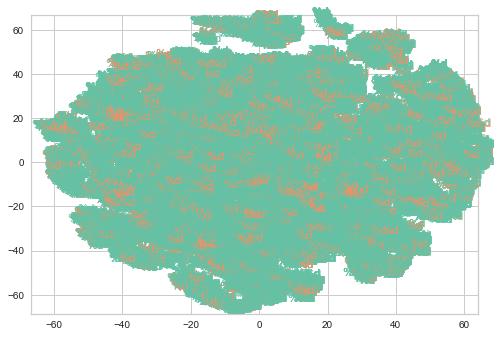

In [245]:
# 2. Visualisation
# On commence par réduire la dimension des données avec tSNE. On scale d’abord les données :
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_50perc_sample)
X_scaled = std_scale.transform(X_50perc_sample)

# Puis on applique tSNE aux données scalées :
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca')
X_trans = tsne.fit_transform(X_scaled)

# Puis on visualise, selon la méthode donnée dans le coup de pouce :
from matplotlib import pyplot as plt # Dans Jupyter : % pylab inline
plt.figure()
for i in range(X_50perc_sample.shape[0]): # pour chaque point
    print(i, '-----')
    plt.text(X_trans[i, 0], X_trans[i, 1], str('X'),
            color=plt.cm.Set2(resultfit_kmeans[1].labels_[i]/10.))

# On redéfinit les axes pour bien voir tous les points
plt.xlim([np.min(X_trans[:, 0]), np.max(X_trans[:, 0])])
plt.ylim([np.min(X_trans[:, 1]), np.max(X_trans[:, 1])])

# On affiche l'image
plt.show()

# Analyse des 3 clusters obtenus

In [31]:
X_clustered = X.copy()

In [32]:
X_clustered['cluster'] = pd.Categorical(resultfit_kmeans[1].labels_)

In [35]:
X_clustered[X_clustered['cluster'] == 0].describe()

order_id_nunique  delta_date_order_first  delta_date_order_last  \
count      33558.000000            33558.000000           33558.000000   
mean           1.061982              451.655363             445.474773   
std            0.297554               93.905827             100.476934   
min            1.000000              212.187662              53.269699   
25%            1.000000              374.532020             370.022214   
50%            1.000000              442.720561             439.116672   
75%            1.000000              520.760084             518.765310   
max           17.000000              744.323241             744.023241   

       freight_value_max  review_score_min  delivery_period_max  \
count       33558.000000      33558.000000         33558.000000   
mean           19.470294          4.285386            11.336496   
std            11.399426          1.140799             5.615264   
min             0.000000          1.000000             0.533414   
25%            14.100000          4.000000             7.253359   
50%            16.260000          5.000000            10.516036   
75%            20.850000          5.000000            14.395231   
max           174.950000          5.000000            63.735324   

       product_volume_cm3_most_frequent  intime_delivery_mean  \
count                      33558.000000          33558.000000   
mean                       16062.279218             13.981933   
std                        22356.897560              7.371780   
min                          288.000000             -9.668495   
25%                         3080.000000              9.261305   
50%                         7714.000000             13.220451   
75%                        20000.000000             17.313681   
max                       287980.000000            146.016123   

       intime_delivery_max  payment_sequential_mean  \
count         33558.000000             33558.000000   
mean             14.183271                 1.029576   
std               7.533805                 0.239577   
min              -9.668495                 1.000000   
25%               9.317361                 1.000000   
50%              13.276400                 1.000000   
75%              17.481192                 1.000000   
max             146.016123                13.500000   

       payment_installments_mean  customer_seller_distance_mean  \
count               33558.000000                   33558.000000   
mean                    3.219925                     636.079660   
std                     2.867394                     590.708974   
min                     1.000000                       0.000000   
25%                     1.000000                     258.925595   
50%                     2.000000                     470.681717   
75%                     5.000000                     831.569539   
max                    24.000000                    3387.259491   

       purchase_frequency_  average_consumer_basket_  
count         33558.000000              33558.000000  
mean              2.886445                197.829909  
std              18.968126                347.542394  
min               0.000000                 10.070000  
25%               0.000000                 64.742500  
50%               0.000000                111.890000  
75%               0.000000                198.440000  
max             304.489456              11745.000000

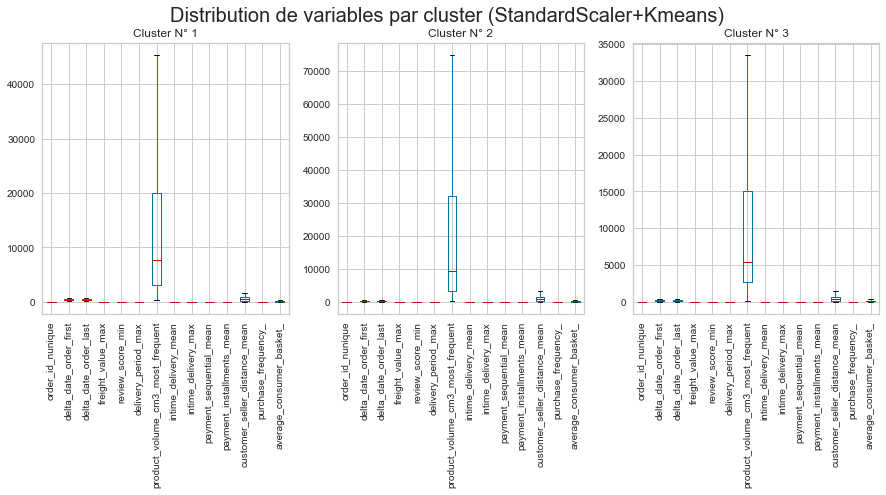

In [224]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
X_clustered[X_clustered['cluster'] == 0].plot(kind='box', rot=90, showfliers=False, ax=axes[0])
axes[0].set_title("Cluster N° 1")
X_clustered[X_clustered['cluster'] == 1].plot(kind='box', rot=90, showfliers=False, ax=axes[1])
axes[1].set_title("Cluster N° 2")
X_clustered[X_clustered['cluster'] == 2].plot(kind='box', rot=90, showfliers=False, ax=axes[2])
axes[2].set_title("Cluster N° 3")
plt.suptitle('Distribution de variables par cluster (StandardScaler+Kmeans)', fontsize = 20) # 
# plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
# plt.ylabel('Volume, cm3', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [36]:
X_clustered[X_clustered['cluster'] == 1].describe()

order_id_nunique  delta_date_order_first  delta_date_order_last  \
count      10316.000000            10316.000000           10316.000000   
mean           1.032183              276.410402             274.666690   
std            0.195270              108.618162             108.316105   
min            1.000000               53.961319              53.961319   
25%            1.000000              214.034271             212.735874   
50%            1.000000              255.891007             253.911429   
75%            1.000000              326.989514             326.847737   
max            5.000000              743.313368             743.313368   

       freight_value_max  review_score_min  delivery_period_max  \
count       10316.000000      10316.000000         10316.000000   
mean           33.041566          2.497189            30.612139   
std            32.529124          1.585101            15.052732   
min             0.000000          1.000000             1.999572   
25%            16.390000          1.000000            22.390978   
50%            21.150000          2.000000            27.936557   
75%            36.370000          4.000000            35.324514   
max           409.680000          5.000000           209.628611   

       product_volume_cm3_most_frequent  intime_delivery_mean  \
count                      10316.000000          10316.000000   
mean                       26943.539162             -4.256495   
std                        42001.647726             14.776683   
min                          352.000000           -188.975081   
25%                         3328.000000             -8.763773   
50%                         9240.000000             -1.983316   
75%                        31920.000000              3.542118   
max                       296208.000000             36.158727   

       intime_delivery_max  payment_sequential_mean  \
count         10316.000000             10316.000000   
mean             -4.030863                 1.021704   
std              14.918316                 0.167358   
min            -188.975081                 1.000000   
25%              -8.726560                 1.000000   
50%              -1.898200                 1.000000   
75%               4.121279                 1.000000   
max              38.273056                 7.500000   

       payment_installments_mean  customer_seller_distance_mean  \
count               10316.000000                   10316.000000   
mean                    3.509861                    1004.325217   
std                     3.106694                     779.425885   
min                     1.000000                       0.000000   
25%                     1.000000                     396.075085   
50%                     2.000000                     737.585038   
75%                     5.000000                    1515.005880   
max                    24.000000                    8677.898938   

       purchase_frequency_  average_consumer_basket_  
count         10316.000000              10316.000000  
mean              0.824028                366.313025  
std               8.278745               1612.063738  
min               0.000000                 15.860000  
25%               0.000000                 81.707500  
50%               0.000000                149.730000  
75%               0.000000                292.105000  
max             168.889126             109312.640000

In [37]:
X_clustered[X_clustered['cluster'] == 2].describe()

order_id_nunique  delta_date_order_first  delta_date_order_last  \
count      49468.000000            49468.000000           49468.000000   
mean           1.018456              181.855090             181.126202   
std            0.141336               79.642503              79.765867   
min            1.000000               49.103947               0.884907   
25%            1.000000              113.229039             112.764604   
50%            1.000000              177.420833             176.801892   
75%            1.000000              248.870703             247.955292   
max            4.000000              358.384317             358.384317   

       freight_value_max  review_score_min  delivery_period_max  \
count       49468.000000      49468.000000         49468.000000   
mean           18.522048          4.356756             9.819362   
std            11.763086          1.092670             5.450117   
min             0.000000          1.000000             0.863426   
25%            12.690000          4.000000             5.861713   
50%            15.940000          5.000000             8.782367   
75%            20.050000          5.000000            13.122749   
max           188.550000          5.000000            39.708542   

       product_volume_cm3_most_frequent  intime_delivery_mean  \
count                      49468.000000          49468.000000   
mean                       12085.586015             12.447442   
std                        16763.867919              7.425110   
min                          168.000000            -11.796470   
25%                         2640.000000              7.168845   
50%                         5440.000000             12.108119   
75%                        15000.000000             16.401684   
max                       195000.000000             70.182847   

       intime_delivery_max  payment_sequential_mean  \
count         49468.000000             49468.000000   
mean             12.503247                 1.018726   
std               7.453884                 0.142263   
min             -11.796470                 1.000000   
25%               7.181186                 1.000000   
50%              12.131215                 1.000000   
75%              16.508351                 1.000000   
max              70.182847                 7.500000   

       payment_installments_mean  customer_seller_distance_mean  \
count               49468.000000                   49468.000000   
mean                    2.555447                     496.807278   
std                     2.378354                     508.847129   
min                     0.000000                       0.000000   
25%                     1.000000                     117.135833   
50%                     1.000000                     365.377244   
75%                     3.000000                     668.533630   
max                    24.000000                    3398.548220   

       purchase_frequency_  average_consumer_basket_  
count         49468.000000              49468.000000  
mean              0.357343                176.505328  
std               4.377004                311.589375  
min               0.000000                  9.590000  
25%               0.000000                 58.780000  
50%               0.000000                103.520000  
75%               0.000000                180.305000  
max             129.035284              11572.800000

<Figure size 648x432 with 0 Axes>

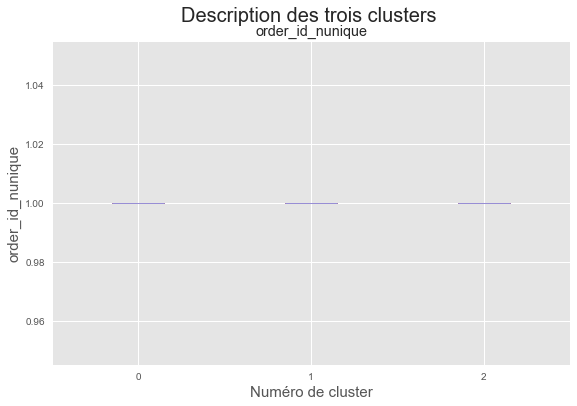

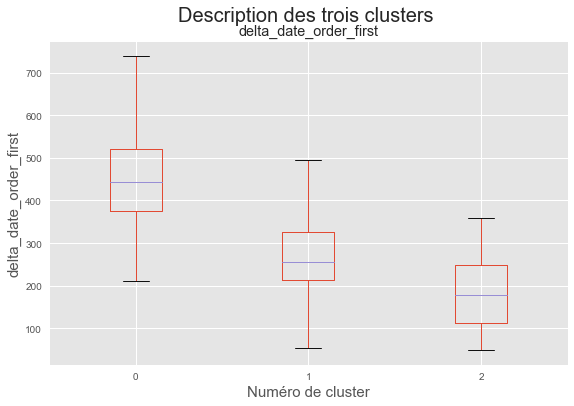

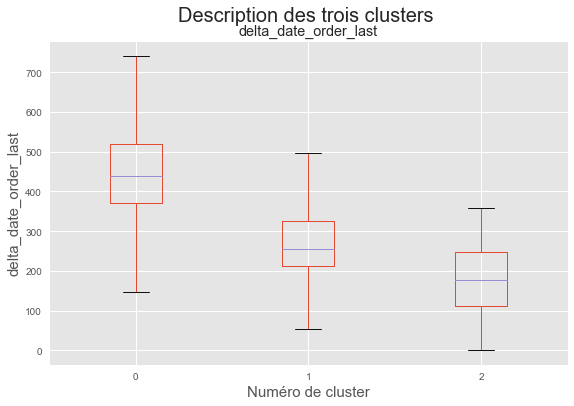

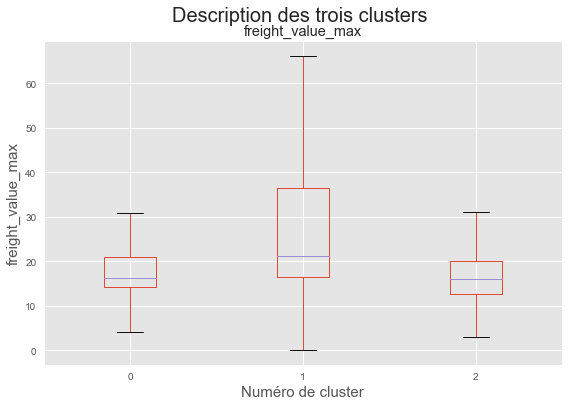

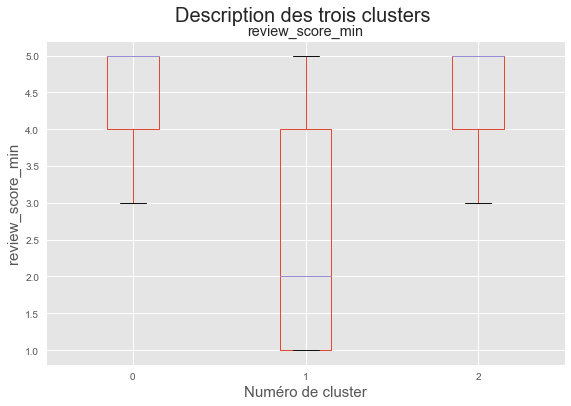

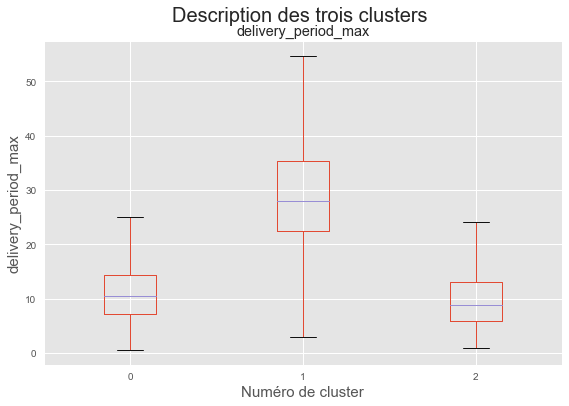

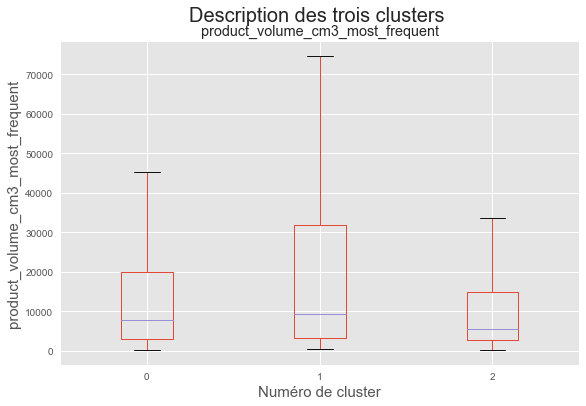

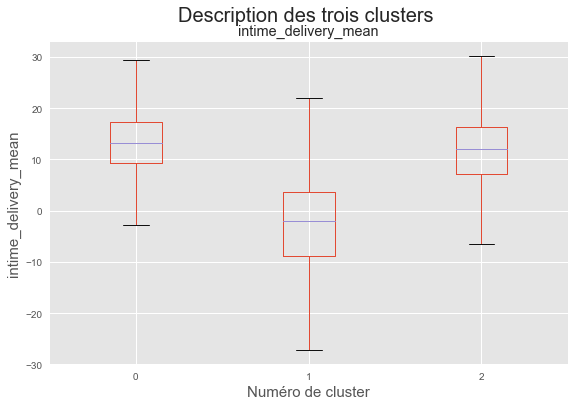

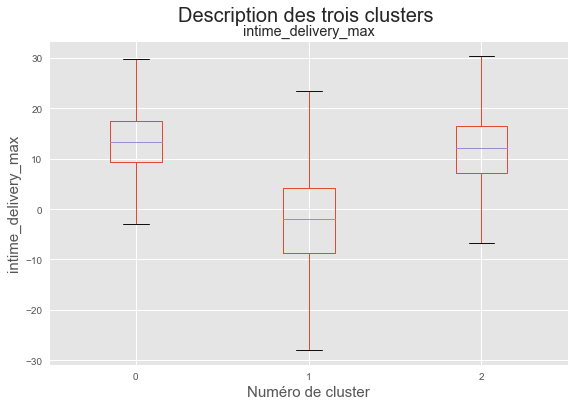

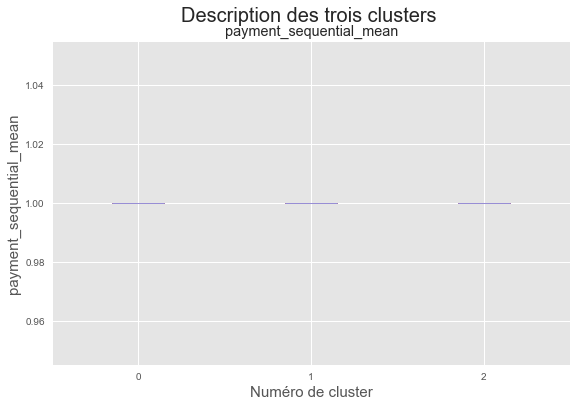

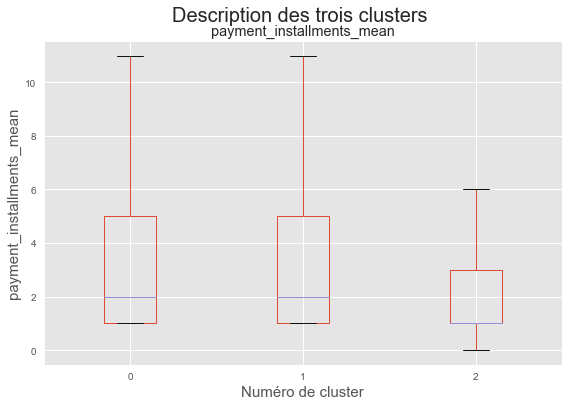

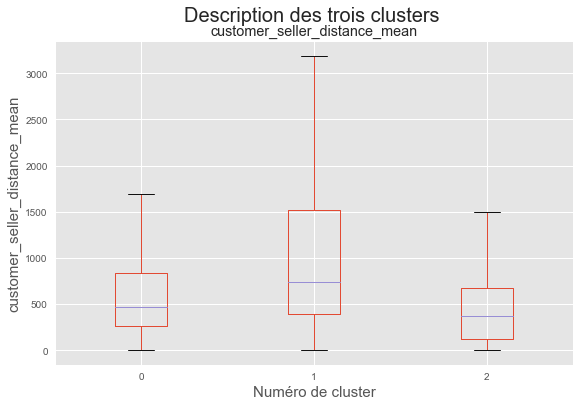

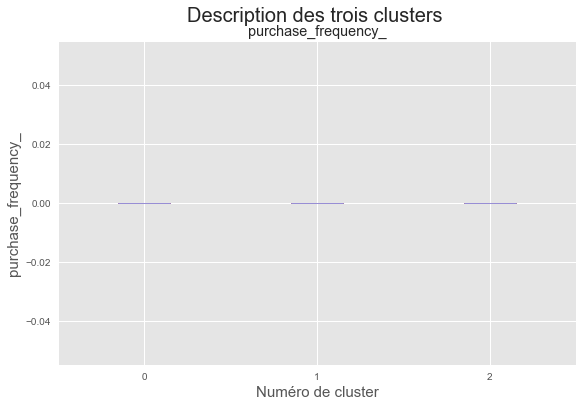

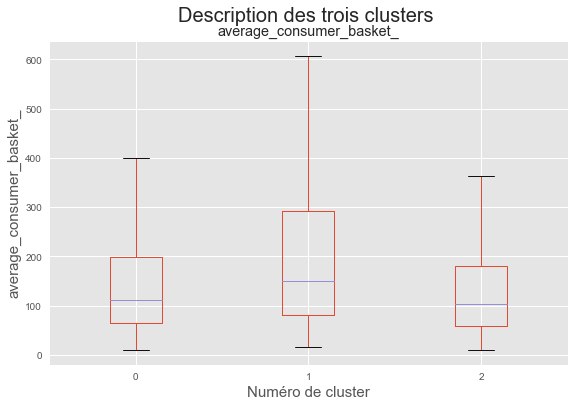

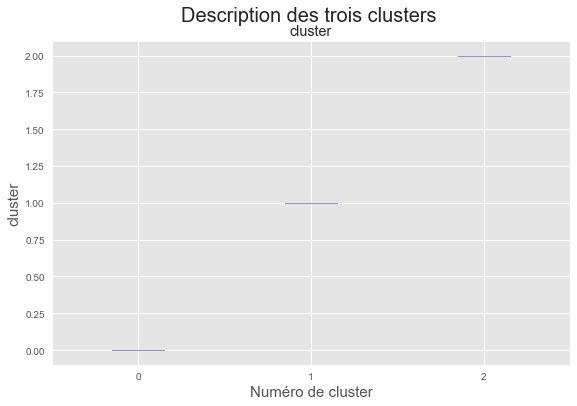

In [378]:
plt.figure()

for col in X_clustered.columns:
    X_clustered.boxplot(column=[col], by= X_clustered['cluster'], showfliers=False)
# plt.title('AAA')
    plt.suptitle('Description des trois clusters ', fontsize = 20) # 
    plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel(f'{col}', fontsize = 15) # y-axis label with fontsize 15
    plt.show()

In [390]:
df_mean = X_clustered.groupby(['cluster']).mean()

In [395]:
df_mean

order_id_nunique  delta_date_order_first  delta_date_order_last  \
cluster                                                                    
0                1.061982              451.655363             445.474773   
1                1.032183              276.410402             274.666690   
2                1.018456              181.855090             181.126202   

         freight_value_max  review_score_min  delivery_period_max  \
cluster                                                             
0                19.470294          4.285386            11.336496   
1                33.041566          2.497189            30.612139   
2                18.522048          4.356756             9.819362   

         product_volume_cm3_most_frequent  intime_delivery_mean  \
cluster                                                           
0                            16062.279218             13.981933   
1                            26943.539162             -4.256495   
2                            12085.586015             12.447442   

         intime_delivery_max  payment_sequential_mean  \
cluster                                                 
0                  14.183271                 1.029576   
1                  -4.030863                 1.021704   
2                  12.503247                 1.018726   

         payment_installments_mean  customer_seller_distance_mean  \
cluster                                                             
0                         3.219925                     636.079660   
1                         3.509861                    1004.325217   
2                         2.555447                     496.807278   

         purchase_frequency_  average_consumer_basket_  
cluster                                                 
0                   2.886445                197.829909  
1                   0.824028                366.313025  
2                   0.357343                176.505328

<Figure size 576x396 with 0 Axes>

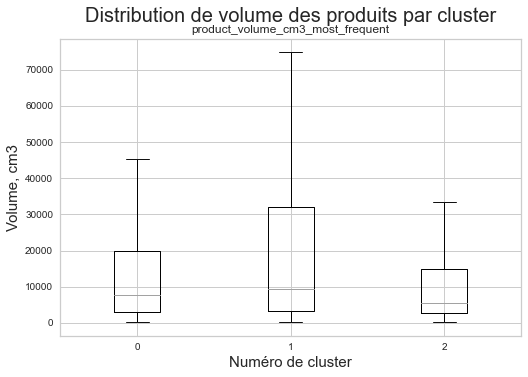

In [151]:
plt.figure()
X_clustered.boxplot(column=['product_volume_cm3_most_frequent'], by= X_clustered['cluster'], showfliers=False)
# plt.title('AAA')
plt.suptitle('Distribution de volume des produits par cluster', fontsize = 20) # 
plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Volume, cm3', fontsize = 15) # y-axis label with fontsize 15
plt.show()

<Figure size 576x396 with 0 Axes>

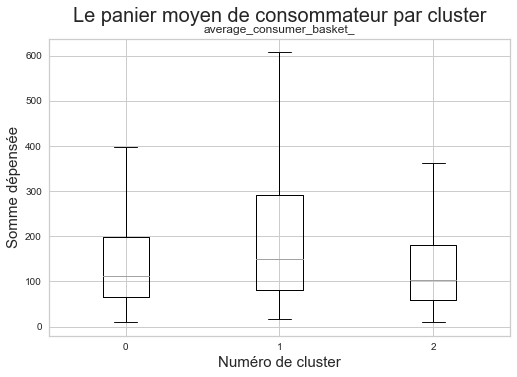

In [153]:
plt.figure()
X_clustered.boxplot(column=['average_consumer_basket_'], by= X_clustered['cluster'], showfliers=False)
# plt.title('AAA')
plt.suptitle('Le panier moyen de consommateur par cluster', fontsize = 20) # 
plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Somme dépensée', fontsize = 15) # y-axis label with fontsize 15
plt.show()

<Figure size 576x396 with 0 Axes>

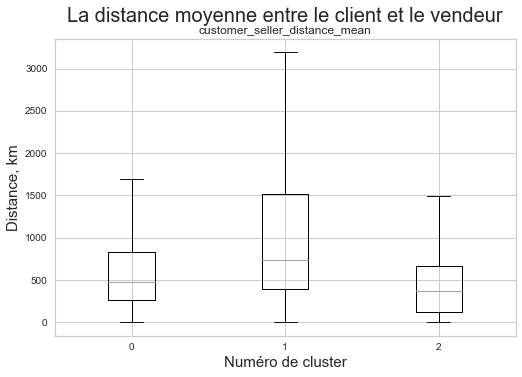

In [154]:
plt.figure()
X_clustered.boxplot(column=['customer_seller_distance_mean'], by= X_clustered['cluster'], showfliers=False)
# plt.title('AAA')
plt.suptitle('La distance moyenne entre le client et le vendeur', fontsize = 20) # 
plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Distance, km', fontsize = 15) # y-axis label with fontsize 15
plt.show()

<Figure size 576x396 with 0 Axes>

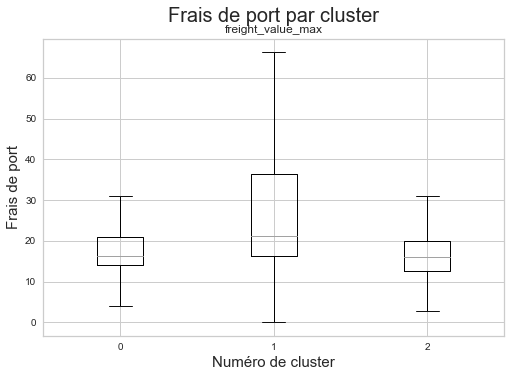

In [157]:
plt.figure()
X_clustered.boxplot(column=['freight_value_max'], by= X_clustered['cluster'], showfliers=False)
# plt.title('AAA')
plt.suptitle('Frais de port par cluster', fontsize = 20) # 
plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Frais de port', fontsize = 15) # y-axis label with fontsize 15
plt.show()

<Figure size 576x396 with 0 Axes>

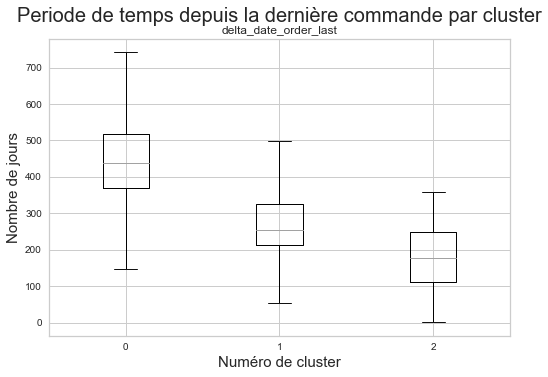

In [158]:
plt.figure()
X_clustered.boxplot(column=['delta_date_order_last'], by= X_clustered['cluster'], showfliers=False)
# plt.title('AAA')
plt.suptitle('Periode de temps depuis la dernière commande par cluster', fontsize = 20) # 
plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Nombre de jours', fontsize = 15) # y-axis label with fontsize 15
plt.show()

<Figure size 576x396 with 0 Axes>

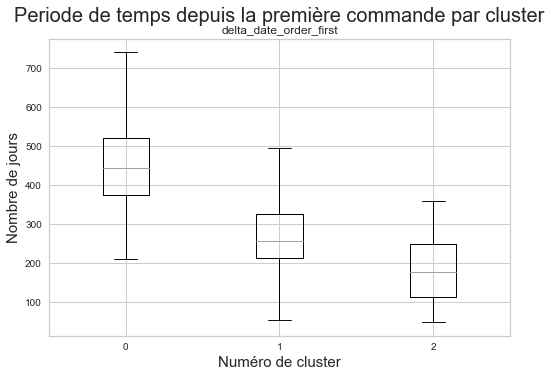

In [172]:
plt.figure()
X_clustered.boxplot(column=['delta_date_order_first'], by= X_clustered['cluster'], showfliers=False)
# plt.title('AAA')
plt.suptitle('Periode de temps depuis la première commande par cluster', fontsize = 20) # 
plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Nombre de jours', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [169]:
X_clustered['purchase_frequency_'].describe()

count    93342.000000
mean         1.318175
std         12.185052
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        304.489456
Name: purchase_frequency_, dtype: float64

<Figure size 576x396 with 0 Axes>

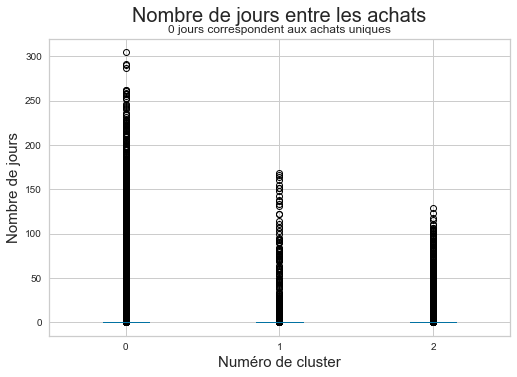

In [216]:
plt.figure()
X_clustered.boxplot(column=['purchase_frequency_'], by= X_clustered['cluster'], showfliers=True, color="b")
plt.title('0 jours correspondent aux achats uniques')
plt.suptitle("Nombre de jours entre les achats", fontsize = 20) # 
plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Nombre de jours', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [213]:
X_clustered['order_id_nunique'].unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 17], dtype=int64)

<Figure size 576x396 with 0 Axes>

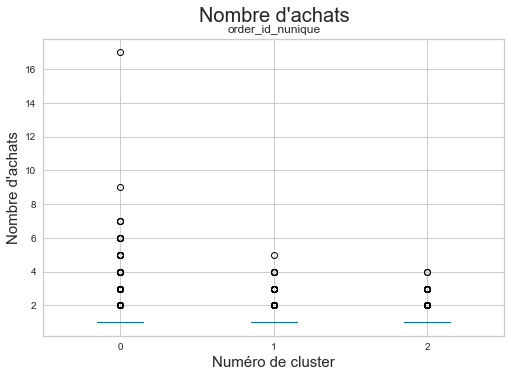

In [217]:
plt.figure()
X_clustered.boxplot(column=['order_id_nunique'], by= X_clustered['cluster'], showfliers=True, color="b")
# plt.title('0 jours correspondent aux achats uniques')
plt.suptitle("Nombre d'achats", fontsize = 20) # 
plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("Nombre d'achats", fontsize = 15) # y-axis label with fontsize 15
plt.show()

<Figure size 648x432 with 0 Axes>

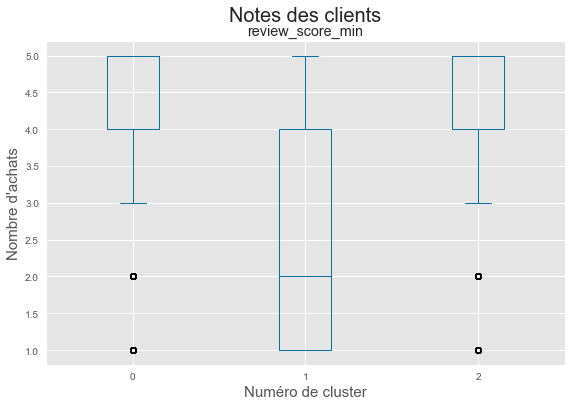

In [372]:
plt.figure()
X_clustered.boxplot(column=['review_score_min'], by= X_clustered['cluster'], showfliers=True, color="b")
# plt.title('0 jours correspondent aux achats uniques')
plt.suptitle("Notes des clients", fontsize = 20) # 
plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("Nombre d'achats", fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [ ]:
# décrire les clusters en calculant une moyenne, diagrammes en boîte pour chaque variable

## StandardScaler(), pca, kmeans

### ACP à 8 composants

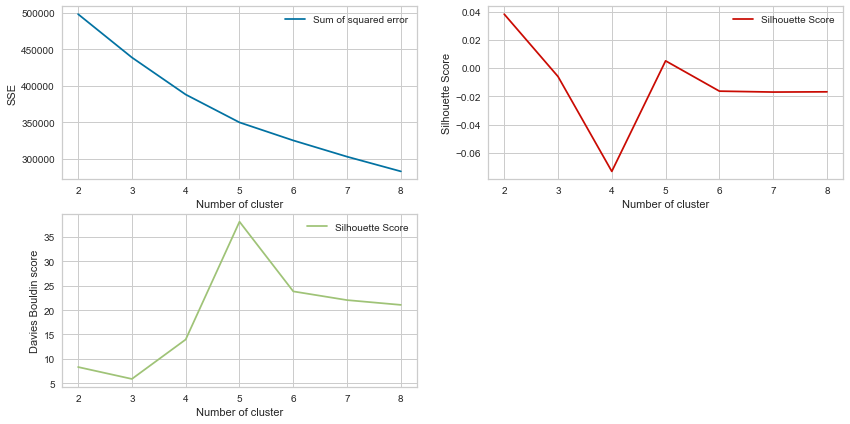

In [173]:
#StandardScaler(), PCA(n_components=8)

df_res_kmeans = pd.DataFrame(columns=['n_clusters', 'inertia', 'silhouette_score', 'davies_bouldin_score'])
pca = PCA(n_components=8)

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    estimator = make_pipeline(StandardScaler(), pca, kmeans).fit(X_50perc_sample)
    labels_k = kmeans.labels_
    #print(data["clusters"])
    inert = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db_score = davies_bouldin_score(X_50perc_sample, labels_k)
    silh_score = metrics.silhouette_score(X_50perc_sample, labels_k, metric='euclidean')
    df_res_kmeans = df_res_kmeans.append({'n_clusters':k, 'inertia':inert, 'silhouette_score':silh_score,
                                          'davies_bouldin_score':db_score}, ignore_index=True)
df_res_kmeans = df_res_kmeans.set_index('n_clusters')

fig = plt.figure(figsize=(14,7))
fig.add_subplot(221)
plt.plot(df_res_kmeans['inertia'],'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(222)
plt.plot(df_res_kmeans['silhouette_score'],'r-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
fig.add_subplot(223)
plt.plot(df_res_kmeans['davies_bouldin_score'],'g-',label='Score de Davies Bouldin')
plt.xlabel("Number of cluster")
plt.ylabel("Davies Bouldin score")
plt.legend()
plt.show()

In [225]:
# affichage
pca_affichage = PCA(2) 
pca_X_ = pd.DataFrame(pca_affichage.fit_transform(X),columns=['PC1','PC2'])

In [226]:
# k = 3, pca à 8 composants
clusterer_kmeans = KMeans(n_clusters=3)
pipeline_kmeans_pca = make_pipeline(StandardScaler(), pca, clusterer_kmeans)
resultfit_kmeans_pca = pipeline_kmeans_pca.fit(X)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

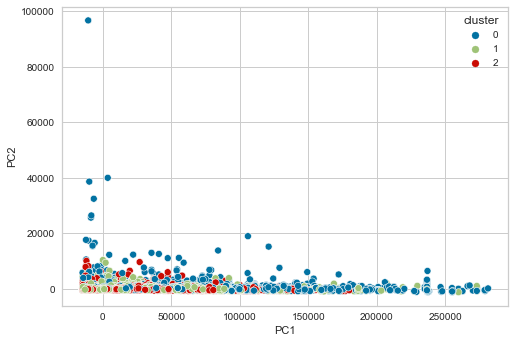

In [227]:
pca_X_['cluster'] = pd.Categorical(resultfit_kmeans_pca[2].labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_X_)

<AxesSubplot:xlabel='tSNE1', ylabel='tSNE2'>

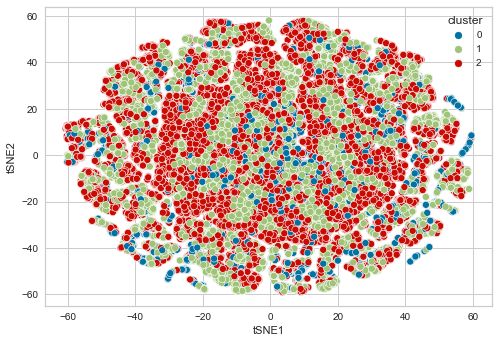

In [248]:
# affichage tSNE
tsne_affichage = TSNE(n_components=2)
X_tsne = pd.DataFrame(tsne_affichage.fit_transform(X),columns=['tSNE1','tSNE2'])
X_tsne['cluster'] = pd.Categorical(resultfit_kmeans_pca[2].labels_)
sns.scatterplot(x="tSNE1",y="tSNE2",hue="cluster",data=X_tsne)

For n_clusters = 3 The average silhouette_score is : -0.007686100569196305


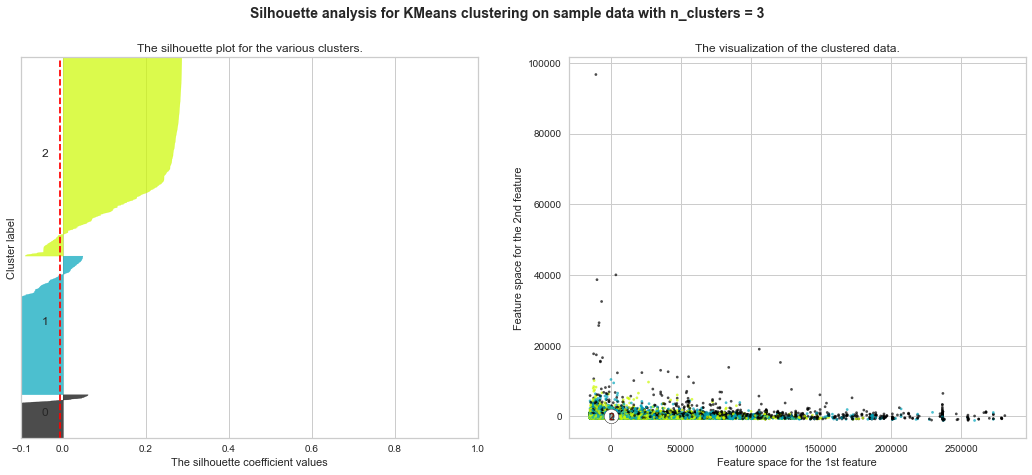

In [234]:
#StandardScaler(), PCA(n_components=8)
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (3 + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
reduced_data = PCA(n_components=2).fit_transform(X)
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(reduced_data)
cluster_labels = resultfit_kmeans_pca[2].labels_

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(reduced_data, cluster_labels)
print("For n_clusters =", 3,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(reduced_data, cluster_labels)

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = resultfit_kmeans_pca[2].cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = 3"),
             fontsize=14, fontweight='bold')

plt.show()

In [228]:
X_pca_ = X.copy()

In [229]:
X_pca_['cluster'] = pd.Categorical(resultfit_kmeans_pca[2].labels_)

## Boxplots

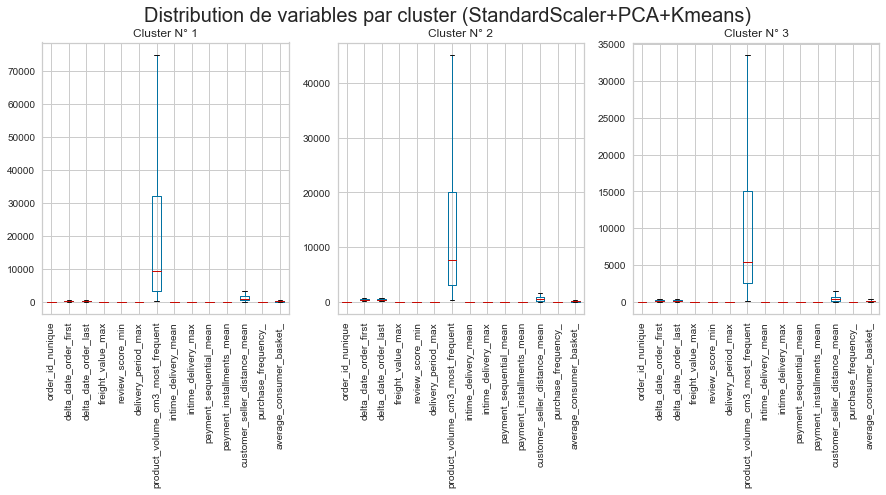

In [230]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
X_pca_[X_pca_['cluster'] == 0].plot(kind='box', rot=90, showfliers=False, ax=axes[0])
axes[0].set_title("Cluster N° 1")
X_pca_[X_pca_['cluster'] == 1].plot(kind='box', rot=90, showfliers=False, ax=axes[1])
axes[1].set_title("Cluster N° 2")
X_pca_[X_pca_['cluster'] == 2].plot(kind='box', rot=90, showfliers=False, ax=axes[2])
axes[2].set_title("Cluster N° 3")
plt.suptitle('Distribution de variables par cluster (StandardScaler+PCA+Kmeans)', fontsize = 20) # 
# plt.xlabel('Numéro de cluster', fontsize = 15) # x-axis label with fontsize 15
# plt.ylabel('Volume, cm3', fontsize = 15) # y-axis label with fontsize 15
plt.show()

### ACP à 2 composants

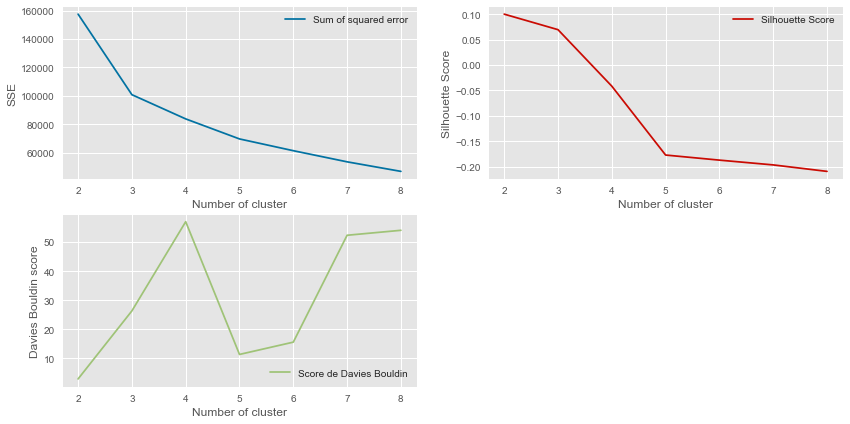

In [396]:
#StandardScaler(), PCA(n_components=2)

df_res_kmeans_pca2 = pd.DataFrame(columns=['n_clusters', 'inertia', 'silhouette_score', 'davies_bouldin_score'])
pca2 = PCA(n_components=2)

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    estimator = make_pipeline(StandardScaler(), pca2, kmeans).fit(X_50perc_sample)
    labels_k = kmeans.labels_
    #print(data["clusters"])
    inert = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db_score = davies_bouldin_score(X_50perc_sample, labels_k)
    silh_score = metrics.silhouette_score(X_50perc_sample, labels_k, metric='euclidean')
    df_res_kmeans_pca2 = df_res_kmeans_pca2.append({'n_clusters':k, 'inertia':inert, 'silhouette_score':silh_score,
                                          'davies_bouldin_score':db_score}, ignore_index=True)
df_res_kmeans_pca2 = df_res_kmeans_pca2.set_index('n_clusters')

fig = plt.figure(figsize=(14,7))
fig.add_subplot(221)
plt.plot(df_res_kmeans_pca2['inertia'],'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(222)
plt.plot(df_res_kmeans_pca2['silhouette_score'],'r-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
fig.add_subplot(223)
plt.plot(df_res_kmeans_pca2['davies_bouldin_score'],'g-',label='Score de Davies Bouldin')
plt.xlabel("Number of cluster")
plt.ylabel("Davies Bouldin score")
plt.legend()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3370398833264333
For n_clusters = 3 The average silhouette_score is : 0.3978487723091318
For n_clusters = 4 The average silhouette_score is : 0.35267451907198516
For n_clusters = 5 The average silhouette_score is : 0.33248437876019177
For n_clusters = 6 The average silhouette_score is : 0.3326839400471044


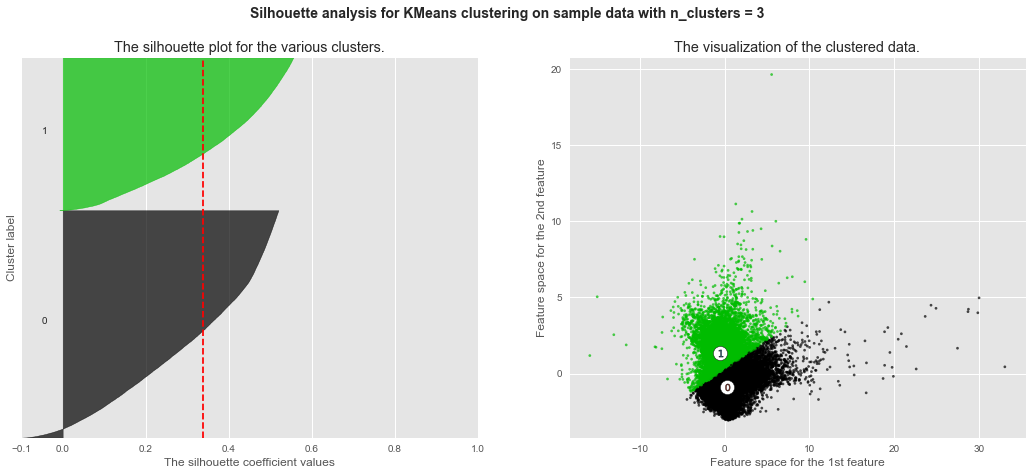

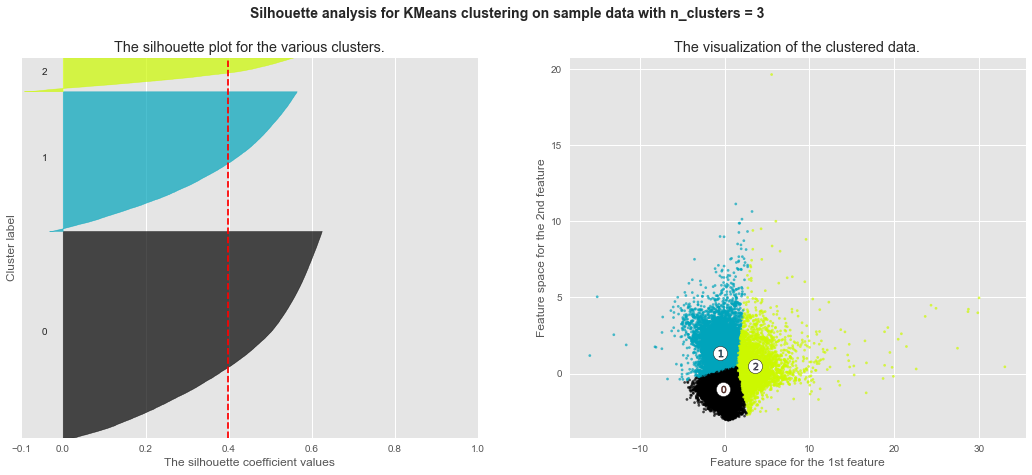

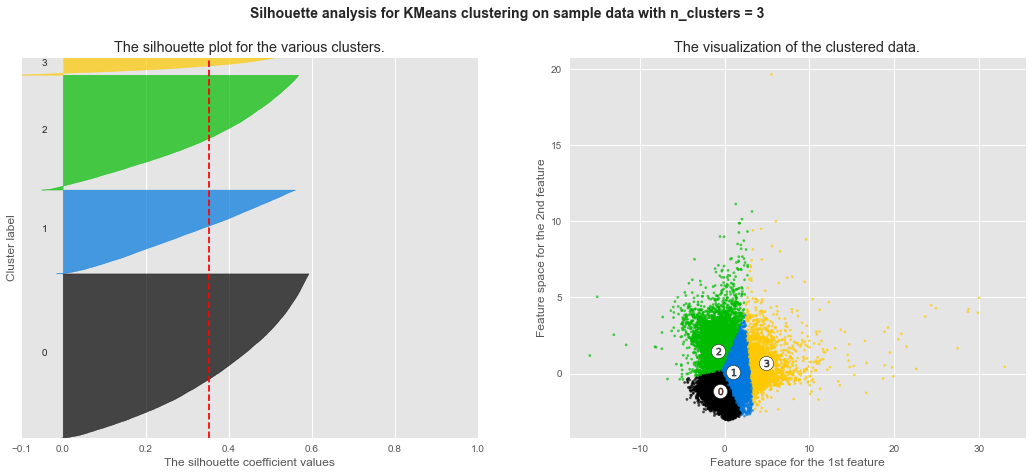

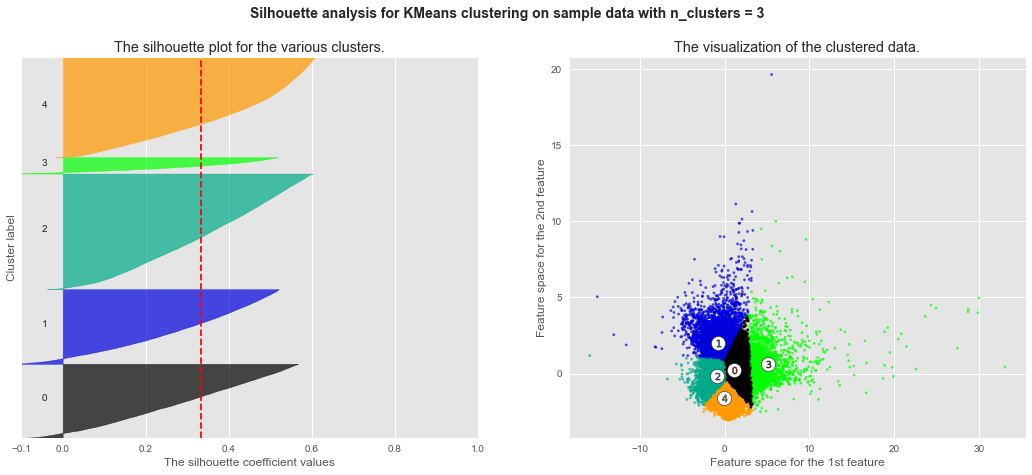

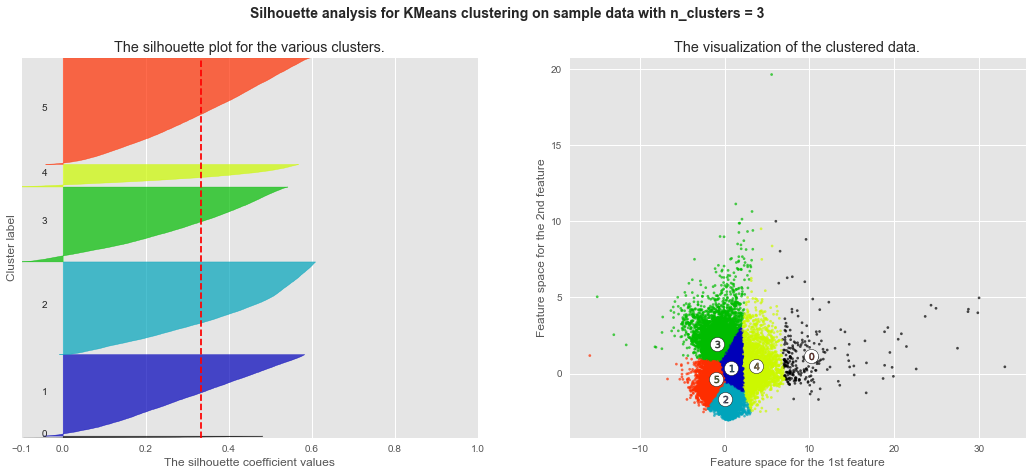

In [400]:
# StandardScaler(), nombre de composants ACP = 2, nombre de clusters = 3
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_50perc_sample) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    X_50perc_sample_scaled = StandardScaler().fit_transform(X_50perc_sample)
    scaled_reduced_data = PCA(n_components=2).fit_transform(X_50perc_sample_scaled)
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(scaled_reduced_data)
    cluster_labels = kmeans.fit_predict(scaled_reduced_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_reduced_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_reduced_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_reduced_data[:, 0], scaled_reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = 3"),
                 fontsize=14, fontweight='bold')

plt.show()

# Noms des clusters
1. Client "dormant"
2. Client mécontent
3. Nouveau client

![Tableau décrivant les charactéristiques des clusters](Tableau_description_clusters.PNG "Charactéristiques de clients par cluster")

## MaxAbsScaler(), kmeans

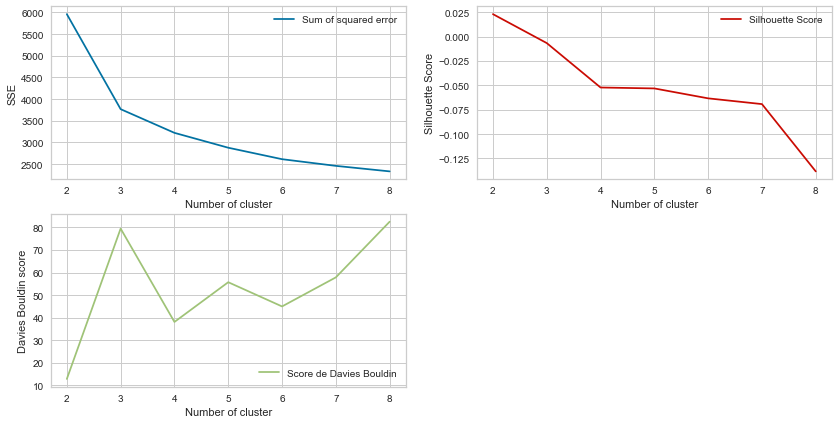

In [251]:
df_res_kmeans = pd.DataFrame(columns=['n_clusters', 'inertia', 'silhouette_score', 'davies_bouldin_score'])
pca = PCA(n_components=8)

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    estimator = make_pipeline(MaxAbsScaler(), kmeans).fit(X_50perc_sample)
    labels_k = kmeans.labels_
    #print(data["clusters"])
    inert = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db_score = davies_bouldin_score(X_50perc_sample, labels_k)
    silh_score = metrics.silhouette_score(X_50perc_sample, labels_k, metric='euclidean')
    df_res_kmeans = df_res_kmeans.append({'n_clusters':k, 'inertia':inert, 'silhouette_score':silh_score,
                                          'davies_bouldin_score':db_score}, ignore_index=True)
df_res_kmeans = df_res_kmeans.set_index('n_clusters')

fig = plt.figure(figsize=(14,7))
fig.add_subplot(221)
plt.plot(df_res_kmeans['inertia'],'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(222)
plt.plot(df_res_kmeans['silhouette_score'],'r-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
fig.add_subplot(223)
plt.plot(df_res_kmeans['davies_bouldin_score'],'g-',label='Score de Davies Bouldin')
plt.xlabel("Number of cluster")
plt.ylabel("Davies Bouldin score")
plt.legend()
plt.show()

For n_clusters = 3 The average silhouette_score is : -0.006617091811541137


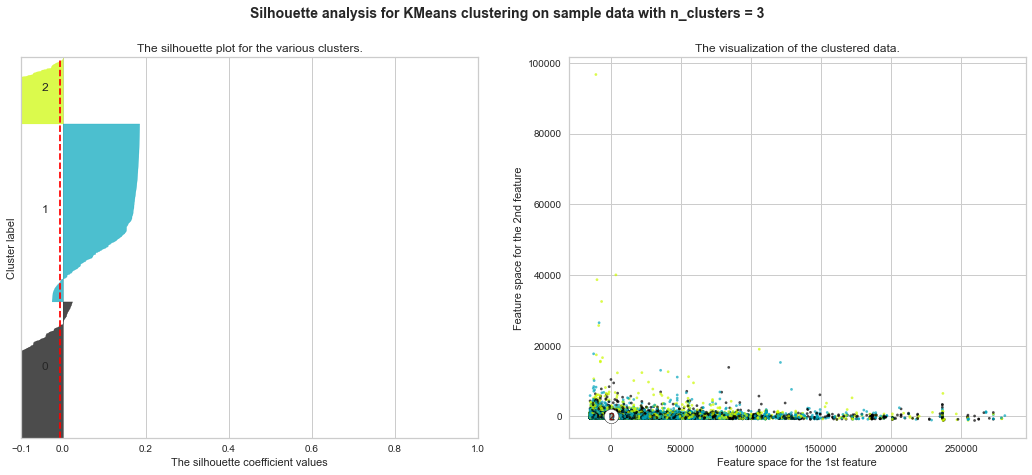

In [252]:
# MaxAbsScaler()
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (3 + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=3)
# kmeans.fit(reduced_data)
estimator_MaxAbsScaler = make_pipeline(MaxAbsScaler(), kmeans).fit(X)
cluster_labels = estimator_MaxAbsScaler[1].labels_

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(reduced_data, cluster_labels)
print("For n_clusters =", 3,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(reduced_data, cluster_labels)

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = resultfit_kmeans_pca[2].cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = 3"),
             fontsize=14, fontweight='bold')

plt.show()

In [253]:
clusterer_kmeans_2 = KMeans(n_clusters=2)
pipeline_kmeans_2 = make_pipeline(MaxAbsScaler(), clusterer_kmeans_2)
resultfit_kmeans_2 = pipeline_kmeans_2.fit(X)

In [254]:
# affichage
pca_affichage = PCA(2) 
pca_X_forK2 = pd.DataFrame(pca_affichage.fit_transform(X),columns=['PC1','PC2'])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

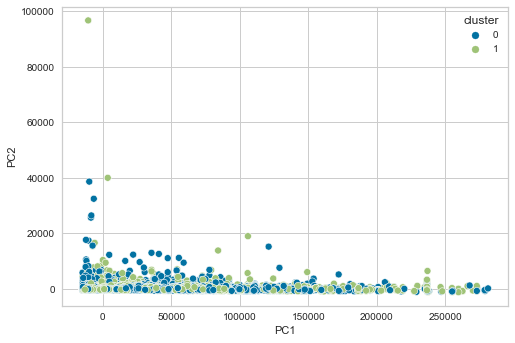

In [255]:
pca_X_forK2['cluster'] = pd.Categorical(resultfit_kmeans_2[1].labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_X_forK2)

<AxesSubplot:xlabel='tSNE1', ylabel='tSNE2'>

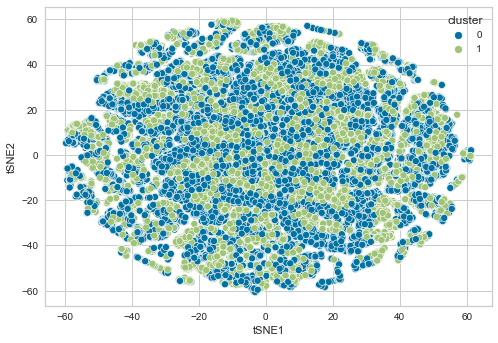

In [256]:
# affichage tSNE
tsne_affichage = TSNE(n_components=2)
X_tsne_fork2 = pd.DataFrame(tsne_affichage.fit_transform(X),columns=['tSNE1','tSNE2'])
X_tsne_fork2['cluster'] = pd.Categorical(resultfit_kmeans_2[1].labels_)
sns.scatterplot(x="tSNE1",y="tSNE2",hue="cluster",data=X_tsne_fork2)

For n_clusters = 3 The average silhouette_score is : -0.021964530864485715


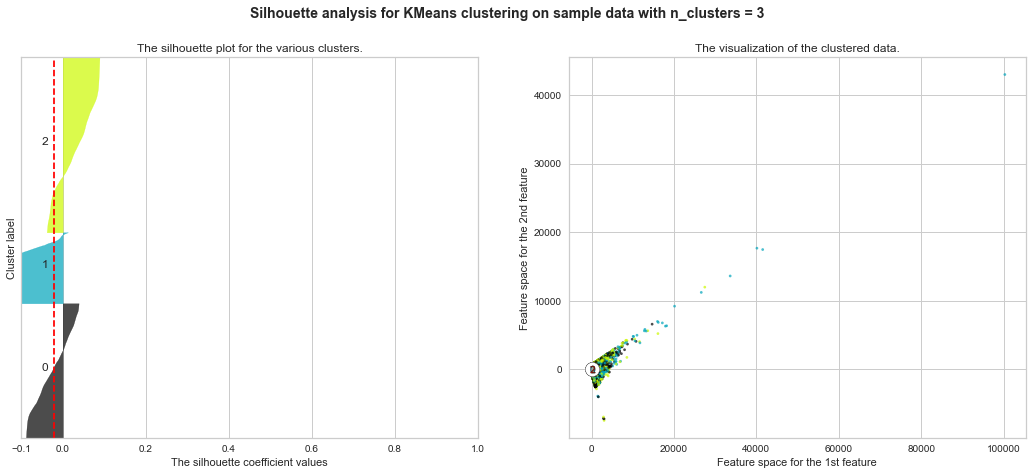

In [20]:
# MinMaxScaler()
# Create a subplot with 1 row and 2 columns
n_clusters = 3
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (3 + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=3)
# kmeans.fit(reduced_data)
estimator_MinMaxScaler = make_pipeline(MinMaxScaler(), kmeans).fit(X)
cluster_labels = kmeans.labels_

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(reduced_data, cluster_labels)
print("For n_clusters =", 3,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(reduced_data, cluster_labels)

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = 3"),
             fontsize=14, fontweight='bold')

plt.show()

In [ ]:
# clustering = AgglomerativeClustering().fit(X)

df_res_clustering_hca = pd.DataFrame(columns=['n_clusters', 'distance', 'silhouette_score', 'davies_bouldin_score'])
# pca2 = PCA(n_components=2)

for k in range(2, 9):
    clustering_hca = AgglomerativeClustering(n_clusters=k)
    estimator = make_pipeline(StandardScaler(), clustering_hca).fit(X_50perc_sample)
    labels_k = clustering_hca.labels_
    #print(data["clusters"])
    dist = clustering_hca.distances_ # 
    db_score = davies_bouldin_score(X_50perc_sample, labels_k)
    silh_score = metrics.silhouette_score(X_50perc_sample, labels_k, metric='euclidean')
    df_res_clustering_hca = df_res_clustering_hca.append({'n_clusters':k, 'distance':inert, 'silhouette_score':silh_score,
                                          'davies_bouldin_score':db_score}, ignore_index=True)
df_res_clustering_hca = df_res_clustering_hca.set_index('n_clusters')

fig = plt.figure(figsize=(14,7))
fig.add_subplot(221)
plt.plot(df_res_clustering_hca['distance'],'b-',label='Distances between nodes')
plt.xlabel("Number of cluster")
plt.ylabel("Distance")
plt.legend()
fig.add_subplot(222)
plt.plot(df_res_clustering_hca['silhouette_score'],'r-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
fig.add_subplot(223)
plt.plot(df_res_clustering_hca['davies_bouldin_score'],'g-',label='Score de Davies Bouldin')
plt.xlabel("Number of cluster")
plt.ylabel("Davies Bouldin score")
plt.legend()
plt.show()

In [ ]:
# StandardScaler(), HCA
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_50perc_sample) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    X_50perc_sample_scaled = StandardScaler().fit_transform(X_50perc_sample)
    scaled_reduced_data = PCA(n_components=2).fit_transform(X_50perc_sample_scaled)
    clustering_hca = AgglomerativeClustering(n_clusters=n_clusters)
    clustering_hca.fit(X_50perc_sample_scaled)
    cluster_labels = clustering_hca.fit_predict(X_50perc_sample_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_50perc_sample_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_50perc_sample_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_reduced_data[:, 0], scaled_reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
#     centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for HCA clustering on sample data "
                  "with n_clusters = 3"),
                 fontsize=14, fontweight='bold')

plt.show()